# **CIS5300 Final Project:** *From Bart to Edge - Education*

## **1. Load and Preprocess (Must Run!)**

### **1.1 Download Libraries**

In [ ]:
!pip install datasets optimum auto-gptq sentencepiece bitsandbytes sacremoses sacrebleu

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 51.8/51.8 kB 2.3 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 480.6/480.6 kB 12.3 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 424.1/424.1 kB 26.2 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 23.5/23.5 MB 62.8 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 69.1/69.1 MB 25.4 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 897.5/897.5 kB 39.0 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **1.2 Import Libraries**

In [ ]:
import zipfile
import os
import pandas as pd
from datasets import Dataset
import random
import torch
from torch.ao.quantization import (
    prepare_qat,
    convert,
    QConfig,
    default_observer,
    default_per_channel_weight_observer,
    get_default_qat_qconfig,
    default_weight_observer
)

from transformers import MBart50Tokenizer, MBartForConditionalGeneration, M2M100Tokenizer, M2M100ForConditionalGeneration, Seq2SeqTrainingArguments, Seq2SeqTrainer, TrainerCallback, AutoModelForCausalLM, AutoTokenizer, pipeline, AutoTokenizer, AutoModelForSeq2SeqLM, BitsAndBytesConfig
from peft import get_peft_model, LoraConfig, TaskType
from transformers import TrainingArguments, Trainer, DataCollatorWithPadding, GenerationConfig
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
from tqdm import tqdm
import copy
from torch.utils.data import DataLoader
import itertools
from itertools import product
import psutil
import time
import matplotlib.pyplot as plt
import threading
import gc

### **1.3 Download and Initialize Models**

#### **1.3.1 mBart**

In [ ]:
# Model names
mbart_model_name = "facebook/mbart-large-50-many-to-many-mmt"

# Source and target languages
SRC_LANG = "zh_CN"
TGT_LANG = "en_XX"

# Initialize mBART model and tokenizer
tokenizer_mbart = MBart50Tokenizer.from_pretrained(mbart_model_name)
model_mbart = MBartForConditionalGeneration.from_pretrained(mbart_model_name)
tokenizer_mbart.src_lang = SRC_LANG
tokenizer_mbart.tgt_lang = TGT_LANG

# Ensure all parameters in the original model are trainable
for param in model_mbart.parameters():
    param.requires_grad = True


# LoRA configuration for mBART
mbart_lora_config = LoraConfig(
    task_type=TaskType.SEQ_2_SEQ_LM,
    inference_mode=False,
    r=8,  # Low-rank dimension
    lora_alpha=64,
    lora_dropout=0.0,
    target_modules=["q_proj", "v_proj"],
)

# Apply LoRA to mBART model
model_mbart_lora = copy.deepcopy(model_mbart)
model_mbart_lora = get_peft_model(model_mbart_lora, mbart_lora_config)

# Verify that only LoRA-specific layers are trainable
for name, param in model_mbart_lora.named_parameters():
    if any(layer in name for layer in mbart_lora_config.target_modules):
        param.requires_grad = True  # LoRA layers should be trainable
    else:
        param.requires_grad = False  # Non-LoRA layers should be frozen


# mBart with Layer Freezing
model_mbart_freeze = copy.deepcopy(model_mbart)

# Layer Freezing Configuration
freeze_encoder_layers = 8  # Number of encoder layers to freeze
freeze_decoder_layers = 8  # Number of decoder layers to freeze

# Apply Layer Freezing to the base mBART model
for name, param in model_mbart_freeze.named_parameters():
    # Freeze encoder layers
    if "encoder.layers" in name:
        layer_num = int(name.split(".")[3])  # Extract layer index
        if layer_num < freeze_encoder_layers:
            param.requires_grad = False  # Freeze parameters
    # Freeze decoder layers
    elif "decoder.layers" in name:
        layer_num = int(name.split(".")[3])  # Extract layer index
        if layer_num < freeze_decoder_layers:
            param.requires_grad = False  # Freeze parameters
    else:
        param.requires_grad = True  # Keep other parameters trainable


print("mBart and tokenizers initialized successfully.")

tokenizer_config.json:   0%|          | 0.00/529 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/649 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.43k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.44G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/261 [00:00<?, ?B/s]

mBart and tokenizers initialized successfully.


In [ ]:
def print_model_parameters(model, model_name="Model"):
    total_params = sum(p.numel() for p in model.parameters())
    trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)

    # Print summaries
    print(f"{model_name} - Total Parameters: {total_params}")
    print(f"{model_name} - Trainable Parameters (All): {trainable_params}")
    print(f"{model_name} - Percentage of Parameters to Fine-tune (All): {100 * trainable_params / total_params:.2f}%\n")

In [ ]:
# Display parameter summaries for the original and LoRA-enhanced models
print_model_parameters(model_mbart, "mBART (original)")
print_model_parameters(model_mbart_lora, "mBART (LoRA)")
print_model_parameters(model_mbart_freeze, "mBART (Layer Freezing)")

mBART (original) - Total Parameters: 610879488
mBART (original) - Trainable Parameters (All): 610879488
mBART (original) - Percentage of Parameters to Fine-tune (All): 100.00%

mBART (LoRA) - Total Parameters: 612059136
mBART (LoRA) - Trainable Parameters (All): 76750848
mBART (LoRA) - Percentage of Parameters to Fine-tune (All): 12.54%

mBART (Layer Freezing) - Total Parameters: 610879488
mBART (Layer Freezing) - Trainable Parameters (All): 375736320
mBART (Layer Freezing) - Percentage of Parameters to Fine-tune (All): 61.51%



#### **1.3.2 M2M100**

In [ ]:
# Model names
mtm_model_name = "facebook/m2m100_418M"

# Initialize M2M100 model and tokenizer
tokenizer_mtm = M2M100Tokenizer.from_pretrained(mtm_model_name)
model_mtm = M2M100ForConditionalGeneration.from_pretrained(mtm_model_name)

# Create a deep copy of the original model for LoRA
model_mtm_lora = copy.deepcopy(model_mtm)

# LoRA configuration for M2M100
mtm_lora_config = LoraConfig(
    task_type=TaskType.SEQ_2_SEQ_LM,
    inference_mode=False,
    r=8,  # Low-rank dimension
    lora_alpha=64,
    lora_dropout=0.0,
    target_modules=["q_proj", "v_proj"],  # Target LoRA modules (check M2M100 architecture)
)

# Apply LoRA to M2M100 model
model_mtm_lora = get_peft_model(model_mtm_lora, mtm_lora_config)

# Ensure only LoRA layers are trainable
for name, param in model_mtm_lora.named_parameters():
    if any(layer in name for layer in mtm_lora_config.target_modules):
        param.requires_grad = True  # LoRA layers
    else:
        param.requires_grad = False  # Non-LoRA layers


# Create a deep copy of the original model for Layer Freezing
model_mtm_freeze = copy.deepcopy(model_mtm)

# Layer Freezing Configuration
freeze_encoder_layers = 8  # Number of encoder layers to freeze
freeze_decoder_layers = 8  # Number of decoder layers to freeze

# Apply Layer Freezing to M2M100 model
for name, param in model_mtm_freeze.named_parameters():
    # Freeze encoder layers
    if "encoder.layers" in name:
        layer_num = int(name.split(".")[3])  # Extract the layer index
        if layer_num < freeze_encoder_layers:
            param.requires_grad = False  # Freeze parameters
    # Freeze decoder layers
    elif "decoder.layers" in name:
        layer_num = int(name.split(".")[3])  # Extract the layer index
        if layer_num < freeze_decoder_layers:
            param.requires_grad = False  # Freeze parameters
    else:
        param.requires_grad = True  # Keep other parameters trainable


print("M2M100 model and tokenizer initialized with LoRA successfully.")

tokenizer_config.json:   0%|          | 0.00/298 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/3.71M [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/1.14k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/908 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.94G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/233 [00:00<?, ?B/s]

M2M100 model and tokenizer initialized with LoRA successfully.


In [ ]:
# Display parameter summaries
print_model_parameters(model_mtm, "M2M100 (original)")
print_model_parameters(model_mtm_lora, "M2M100 (LoRA)")
print_model_parameters(model_mtm_freeze, "M2M100 (Layer Freezing)")

M2M100 (original) - Total Parameters: 483905536
M2M100 (original) - Trainable Parameters (All): 483905536
M2M100 (original) - Percentage of Parameters to Fine-tune (All): 100.00%

M2M100 (LoRA) - Total Parameters: 485085184
M2M100 (LoRA) - Trainable Parameters (All): 76750848
M2M100 (LoRA) - Percentage of Parameters to Fine-tune (All): 15.82%

M2M100 (Layer Freezing) - Total Parameters: 483905536
M2M100 (Layer Freezing) - Trainable Parameters (All): 248762368
M2M100 (Layer Freezing) - Percentage of Parameters to Fine-tune (All): 51.41%



### **1.4 Load and Preprocess Data**

In [ ]:
def load_data_from_txt(txt_file_path, sample_size=100000, train_ratio=0.8, dev_ratio=0.1, encoding='utf-8'):
    # Check if the file exists
    if not os.path.isfile(txt_file_path):
        print("The specified .txt file does not exist.")
        return None, None, None

    # Initialize lists to hold English and Chinese sentences
    english_sentences = []
    chinese_sentences = []

    try:
        # Read the text file line by line
        with open(txt_file_path, 'r', encoding=encoding) as f:
            lines = [line.strip() for line in f]

        # Separate English and Chinese sentences by alternating lines
        for i in range(0, len(lines) - 1, 2):
            english_sentences.append(lines[i])
            chinese_sentences.append(lines[i + 1])

        # Ensure equal number of English and Chinese sentences
        min_length = min(len(english_sentences), len(chinese_sentences))
        english_sentences = english_sentences[:min_length]
        chinese_sentences = chinese_sentences[:min_length]

        # Create a DataFrame for paired sentences
        data = pd.DataFrame({"english_text": english_sentences, "chinese_text": chinese_sentences})

        # Shuffle the dataset
        data = data.sample(frac=1).reset_index(drop=True)

        # Adjust sample size if data size is less than requested sample size
        sample_size = min(sample_size, len(data))
        data = data.sample(n=sample_size, random_state=42)

        # Calculate the number of samples for each split
        train_end = int(sample_size * train_ratio)
        dev_end = train_end + int(sample_size * dev_ratio)

        # Split the dataset into train, dev, and test sets
        train_data = data[:train_end]
        dev_data = data[train_end:dev_end]
        test_data = data[dev_end:]

        print(f"Loaded train data with {len(train_data)} samples.")
        print(f"Loaded dev data with {len(dev_data)} samples.")
        print(f"Loaded test data with {len(test_data)} samples.")

        return train_data, dev_data, test_data

    except UnicodeDecodeError as e:
        print(f"Error reading the file: {e}")
        return None, None, None

In [ ]:
def preprocess_data(data, tokenizer, max_length=50, src_lang=None, tgt_lang=None):
    """
    Preprocesses the data for tokenization.

    Args:
        data (pd.DataFrame): Input data containing source and target texts.
        tokenizer: Tokenizer to use for processing.
        max_length (int): Maximum sequence length.
        src_lang (str): Source language code (e.g., 'zh' for Chinese). Set to None if not required.
        tgt_lang (str): Target language code (e.g., 'en' for English). Set to None if not required.

    Returns:
        Dataset: Tokenized dataset ready for model input.
    """
    dataset = Dataset.from_pandas(data)

    def tokenize_function(batch):
        # Optionally set language codes for M2M100 or similar models
        if src_lang is not None:
            tokenizer.src_lang = src_lang
        if tgt_lang is not None:
            tokenizer.tgt_lang = tgt_lang

        # Tokenize the source text
        inputs = tokenizer(
            batch["chinese_text"],
            padding="max_length",
            truncation=True,
            max_length=max_length
        )

        # Tokenize the target text
        targets = tokenizer(
            batch["english_text"],
            padding="max_length",
            truncation=True,
            max_length=max_length
        )

        # Prepare labels and replace padding tokens with -100 for loss calculation
        batch["input_ids"] = inputs["input_ids"]
        batch["attention_mask"] = inputs["attention_mask"]
        batch["labels"] = [
            [(token if token != tokenizer.pad_token_id else -100) for token in label]
            for label in targets["input_ids"]
        ]
        return batch

    # Tokenize and reformat the dataset
    tokenized_dataset = dataset.map(tokenize_function, batched=True, remove_columns=["english_text", "chinese_text"])
    tokenized_dataset.set_format(type="torch", columns=["input_ids", "attention_mask", "labels"])

    return tokenized_dataset

In [ ]:
# Load and preprocess the dataset
data_file_path = "/content/drive/MyDrive/CIS5800/Bilingual/Education/Bi-Education.txt"
train_data, dev_data, test_data = load_data_from_txt(data_file_path)

Loaded train data with 80000 samples.
Loaded dev data with 10000 samples.
Loaded test data with 10000 samples.


### **1.5 Initialize Evaluation Metrics: BLEU**

In [ ]:
def format_prompt(chinese_text):
    return f'''Below is a Chinese sentence. Translate it into English.

### Instruction:
{chinese_text}

### Response:
'''

def evaluate_bleu_score(model, tokenizer, test_data, max_length=50, device="cuda", model_type = "mbart"):
    """
    Evaluates the BLEU score of a given model on a test dataset.

    Parameters:
    - model: The translation model to evaluate (e.g., trained mBART model).
    - tokenizer: The tokenizer corresponding to the model.
    - test_data: The test dataset containing "chinese_text" and "english_text" columns.
    - max_length: Maximum sequence length for translation generation.
    - device: The device to run the evaluation on ("cuda" or "cpu").

    Returns:
    - average_bleu: The average BLEU score for the test set.
    """
    # Move model to the specified device
    model = model.to(device)
    smooth_fn = SmoothingFunction().method1

    # Prepare the test sentences
    test_chinese_sentences = test_data["chinese_text"].tolist()
    test_english_references = test_data["english_text"].tolist()

    if Alpaca:
      test_chinese_sentences = [format_prompt(sentence) for sentence in test_chinese_sentences]

    bleu_scores = []

    # Progress bar for tracking
    for src_sentence, ref_sentence in tqdm(zip(test_chinese_sentences, test_english_references),
                                           total=len(test_chinese_sentences),
                                           desc="Calculating BLEU Scores"):
        # Tokenize and prepare the input with max_length
        inputs = tokenizer(src_sentence, return_tensors="pt", padding=True, truncation=True, max_length=max_length).to(device)

        # Generate translation
        with torch.no_grad():
          if model_type == "mabrt":
            generated_tokens = model.generate(**inputs, max_length=max_length)

          elif model_type == "m2m":
            generated_tokens = model.generate(**inputs, forced_bos_token_id=tokenizer.lang_code_to_id["en"])

        # Decode generated tokens to text
        generated_sentence = tokenizer.decode(generated_tokens[0], skip_special_tokens=True)

        if model = "alpaca":
          generated_sentence = generated_sentence.replace('</s>', '')

        # Tokenize reference and hypothesis for BLEU calculation
        reference = [ref_sentence.split()]  # Reference should be a list of lists for sentence_bleu
        hypothesis = generated_sentence.split()

        # Compute BLEU score with smoothing
        bleu_score = sentence_bleu(reference, hypothesis, smoothing_function=smooth_fn)
        bleu_scores.append(bleu_score)

    # Calculate and return the average BLEU score for the test set
    average_bleu = sum(bleu_scores) / len(bleu_scores)
    print(f"Average BLEU score for the test set: {average_bleu:.4f}")

    return average_bleu

SyntaxError: invalid syntax. Maybe you meant '==' or ':=' instead of '='? (<ipython-input-24-459752d69b64>, line 55)

In [ ]:
def error_evaluate(model, tokenizer, test_data, save_path, max_length=50, device="cuda", bleu_threshold=0.1, model_type = "mabrt"):
    """
    Evaluate a translation model on a test set using BLEU score.

    Parameters:
    - model: Translation model (e.g., mBART).
    - tokenizer: Tokenizer corresponding to the model.
    - test_data: Test dataset as a DataFrame with 'chinese_text' and 'english_text' columns.
    - save_path: Path to save the incorrect examples as a CSV file.
    - max_length: Maximum sequence length for generated translations (default=50).
    - device: Device to run the evaluation ('cuda' or 'cpu').
    - bleu_threshold: BLEU score threshold to determine correctness (default=0.1).

    Returns:
    - results_df: DataFrame containing evaluation results.
    - errors_df: DataFrame containing incorrect examples.
    """
    # Move model to the specified device
    model = model.to(device)

    # Initialize smoothing function
    smooth_fn = SmoothingFunction().method1

    # Results storage
    results = []

    # Process test data
    for idx, row in tqdm(test_data.iterrows(), total=len(test_data), desc="Evaluating BLEU"):
        chinese_input = row["chinese_text"]
        ground_truth = row["english_text"]

        # Step 1: Tokenize and move input to device
        inputs = tokenizer(chinese_input, return_tensors="pt", truncation=True, padding=True)
        inputs = {key: value.to(device) for key, value in inputs.items()}

        # Step 2: Generate translation
        with torch.no_grad():
          if model_type == "mabrt":
            translated_tokens = model.generate(
                **inputs, max_length=max_length, forced_bos_token_id=tokenizer.lang_code_to_id["en_XX"]
            )
          elif model_type == "m2m":
            translated_tokens = model.generate(**inputs, forced_bos_token_id=tokenizer.lang_code_to_id["en"])

        prediction = tokenizer.decode(translated_tokens[0], skip_special_tokens=True)

        # Step 3: Calculate BLEU score
        reference = [ground_truth.split()]  # Reference sentence split into tokens
        hypothesis = prediction.split()     # Hypothesis sentence split into tokens
        bleu_score = sentence_bleu(reference, hypothesis, smoothing_function=smooth_fn)

        # Step 4: Determine correctness
        is_correct = bleu_score >= bleu_threshold

        # Step 5: Append results
        results.append({
            "chinese_input": chinese_input,
            "ground_truth": ground_truth,
            "prediction": prediction,
            "bleu_score": round(bleu_score, 3),
            "correct": is_correct
        })

    # Convert to DataFrame
    results_df = pd.DataFrame(results)

    # Filter incorrect translations
    errors_df = results_df[~results_df["correct"]]

    # Print and save results
    print("\nAll Results:")
    print(results_df)

    print("\nError Examples:")
    print(errors_df)

    # Save errors to CSV file
    errors_df.to_csv(save_path, index=False)
    print(f"Error examples saved to '{save_path}'")

    return results_df, errors_df

### **1.6 GPU and Memory Monitoring**

In [ ]:
file_path_m2m = "/content/drive/MyDrive/CIS5800/Log/m2m/memory_usage.log"
file_path_m2m_lora = "/content/drive/MyDrive/CIS5800/Log/memory_usage_lora.log"

file_path_mBART = "/content/drive/MyDrive/CIS5800/Log/mBART/memory_usage.log"
file_path_mBART_lora = "/content/drive/MyDrive/CIS5800/Log/mBART/memory_usage_lora.log"

paths = [file_path_m2m, file_path_m2m_lora, file_path_mBART, file_path_mBART_lora]

for file_path in paths:
  directory_path = os.path.dirname(file_path)
  if not os.path.exists(directory_path):
    os.makedirs(directory_path, exist_ok=True)
  print(f"Directory created or already exists: {directory_path}")

Directory created or already exists: /content/drive/MyDrive/CIS5800/Log/m2m
Directory created or already exists: /content/drive/MyDrive/CIS5800/Log
Directory created or already exists: /content/drive/MyDrive/CIS5800/Log/mBART
Directory created or already exists: /content/drive/MyDrive/CIS5800/Log/mBART


In [ ]:
# Define a function to monitor memory usage

class MemoryUsageLogger(TrainerCallback):
    def __init__(self, log_file):
        self.log_file = log_file
        # Initialize the log file and write headers
        with open(log_file, "w") as f:
            f.write("Step,Timestamp,Time (s),RAM Usage (GB),GPU Memory Usage (GB)\n")
        self.start_time = time.time()

    def on_step_end(self, args, state, control, **kwargs):
        # Calculate memory usage
        process = psutil.Process(os.getpid())
        ram_usage = process.memory_info().rss / (1024 ** 3)  # Convert to GB

        gpu_memory = 0
        if torch.cuda.is_available():
            gpu_memory = torch.cuda.memory_allocated() / (1024 ** 3)  # Convert to GB

        # Log memory usage
        current_time = time.time() - self.start_time
        timestamp = time.strftime("%Y-%m-%d %H:%M:%S", time.localtime())
        with open(self.log_file, "a") as f:
            f.write(f"{state.global_step},{timestamp},{current_time:.2f},{ram_usage:.2f},{gpu_memory:.2f}\n")

        # Optional: Print to console for real-time monitoring
        print(f"Step: {state.global_step}, Timestamp: {timestamp}, RAM: {ram_usage:.2f} GB, GPU: {gpu_memory:.2f} GB")


# Analyze logs to find top 15 memory usages
def analyze_logs(log_file, output_file):
    """
    Analyzes the memory log file to find the top 15 GPU and RAM usages
    along with their timestamps and saves the results to a file.

    Args:
        log_file (str): Path to the input log file.
        output_file (str): Path to the output file.
    """
    # Check if the log file exists
    if not os.path.exists(log_file):
        raise FileNotFoundError(f"Log file '{log_file}' does not exist.")

    # Read the log file into a DataFrame
    df = pd.read_csv(log_file)

    # Find the top 15 GPU memory usages
    top_gpu_usage = df.nlargest(15, "GPU Memory Usage (GB)")

    # Find the top 15 RAM usages
    top_ram_usage = df.nlargest(15, "RAM Usage (GB)")

    # Combine the results
    combined = pd.concat([top_gpu_usage, top_ram_usage]).drop_duplicates().sort_values(by="Time (s)")

    # Ensure output file exists or create it
    if not os.path.exists(output_file):
        with open(output_file, "w") as f:
            f.write("")  # Create an empty file if it doesn't exist

    # Save the results to the output file
    combined.to_csv(output_file, index=False)

    print(f"Analysis complete. Top 15 memory logs saved to: {output_file}")


## **2. Baseline Evaluation (50,000 Samples)**

### **2.1 Load Dataset (50,000)**

In [ ]:
# Load and preprocess the dataset
train_data, dev_data, test_data = load_data_from_txt(data_file_path, sample_size = 50000)

tokenized_data_mbart_train = preprocess_data(train_data, tokenizer_mbart)
tokenized_data_mbart_dev = preprocess_data(dev_data, tokenizer_mbart)
tokenized_data_mbart_test = preprocess_data(test_data, tokenizer_mbart)

tokenized_data_mtm_train = preprocess_data(train_data, tokenizer_mtm, max_length=20, src_lang="zh", tgt_lang="en")
tokenized_data_mtm_dev = preprocess_data(dev_data, tokenizer_mtm, max_length=20, src_lang="zh", tgt_lang="en")
tokenized_data_mtm_test = preprocess_data(test_data, tokenizer_mtm, max_length=20, src_lang="zh", tgt_lang="en")

print(train_data.head())
print(dev_data.head())
print(test_data.head())

Loaded train data with 40000 samples.
Loaded dev data with 5000 samples.
Loaded test data with 5000 samples.


Map:   0%|          | 0/40000 [00:00<?, ? examples/s]

Map:   0%|          | 0/5000 [00:00<?, ? examples/s]

Map:   0%|          | 0/5000 [00:00<?, ? examples/s]

Map:   0%|          | 0/40000 [00:00<?, ? examples/s]

Map:   0%|          | 0/5000 [00:00<?, ? examples/s]

Map:   0%|          | 0/5000 [00:00<?, ? examples/s]

                                             english_text  \
234806  Pottery Barn: If I was a genie and could give ...   
41549   First, during slewing, the voltage at the sour...   
169822  Locke: I think that's overdoing it just a bit ...   
313751  Amanda: I think I'll stick to a scoop of class...   
32640   And it is expected that other interested parti...   

                                          chinese_text  
234806  ÂÆ∂Â±ÖÁî®ÂìÅÈô∂Áì∑Ë∞∑‰ªìÔºöËÆæÊÉ≥Â¶ÇÊûúÊàëÊòØ‰∏Ä‰∏™Â§©ÊâçÔºåÊàëËÉΩÁªô‰∫é‰Ω†ÁêÜÊÉ≥ÁöÑÂ∑•‰ΩúÔºåÂ∑•‰Ωú‰ºöÊòØ‰ªÄ‰πàÔºü Â∑•‰Ωú‰ºöÂú®Âì™ÈáåÔºü  
41549                      Á¨¨‰∏ÄÁßçÔºåÂú®ÂõûÊëÜËøáÁ®ã‰∏≠ÔºåÂú®M5ÂíåM8Ê∫êÂ§ÑÁöÑÁîµÂéãÂèØËÉΩÈôç‰Ωé„ÄÇ  
169822                 ‰∏≠ÊñáÊÑèÊÄùÔºöÊ¥õÂÖãÔºöÊàëËÆ§‰∏∫ËøôÂÅöÂæóÊúâ‰∏ÄÁÇπÁÇπËøáÂàÜÔºåËøòÊòØÂú®‰ªñÂ§¥‰∏äÁªë‰∏ÄÊù°‚Ä¶  
313751              ÈòøÊõºËææÔºöÊàëÊÉ≥ÊàëËøòÊòØË¶Å‰∏ÄÂã∫ÁªèÂÖ∏È¶ôËçâÂè£Âë≥ÁöÑÈô§Èùû‰Ω†ÊÉ≥ÂíåÊàë‰∏ÄËµ∑ÂêÉ‰∏Ä‰∏™È¶ôËïâËàπ„ÄÇ  
32640                    ‰ªñËøòÂ∏åÊúõÂÖ∂‰ªñÊúâÂÖ≥ÂΩì‰∫ã‰∫∫ËÉΩÊäïÊîæÁ´üÊ†á‰πüËÆ∏ËÉΩ

### **2.2 Regular mBart**

In [ ]:
# Prepare input text
text = "ÊàëÁà±Êú∫Âô®Â≠¶‰π†ÔºåÊàëÁà±Ëá™ÁÑ∂ËØ≠Ë®ÄÂ§ÑÁêÜ"
inputs = tokenizer_mbart(text, return_tensors="pt")

# Generate translation
translated_tokens = model_mbart.generate(**inputs, forced_bos_token_id=tokenizer_mbart.lang_code_to_id["en_XX"])
translation = tokenizer_mbart.decode(translated_tokens[0], skip_special_tokens=True)

print("Translation:", translation)

Translation: I love machine learning, I love natural language processing


In [ ]:
average_bleu = evaluate_bleu_score(model=model_mbart, tokenizer=tokenizer_mbart, test_data=test_data)

Calculating BLEU Scores: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 5000/5000 [51:06<00:00,  1.63it/s]

Average BLEU score for the test set: 0.1169


In [ ]:
error_evaluate(model_mbart, tokenizer_mbart, test_data, "/content/drive/MyDrive/CIS5800/Error/mBart_base", max_length=50, device="cuda", bleu_threshold=0.1)

Evaluating BLEU: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 5000/5000 [47:01<00:00,  1.77it/s]


All Results:
                                         chinese_input  \
0                              ÈõÖÂÖ∏Â®ú: Êàë‰ª¨ÂºÄÂßãÂΩºÊ≠§Áªü‰∏ÄÔºå‰ª•ÊÑüÊøÄÂíåÊ¨¢‰πê‰∏ÄËµ∑„ÄÇ   
1                             GDPË¢´ÂÖ¨ËÆ§‰∏∫Ë°°Èáè‰∏Ä‰∏™ÂõΩÂÆ∂ÁªèÊµéÂÆûÂäõÁöÑÊúÄÈáçË¶ÅÊåáÊ†á„ÄÇ   
2                                Êç∑ÂÖãÂÖ±ÂíåÂõΩÁöÑÊâ¨?Âç°‰∏áÊòØÁõÆÂâçÁöÑËÅîÂ§ß‰ºöËÆÆ‰∏ªÂ∏≠„ÄÇ   
3     Â§ßÈ∫ªÁ±ΩÊèê‰æõ‰∫ÜÊâÄÊúâÂøÖÈúÄÁöÑÊ∞®Âü∫ÈÖ∏ÔºåËøôÊÑèÂë≥ÁùÄÂÆÉ‰ª¨Âê´ÊúâÁöÑËõãÁôΩË¥®ËÉΩÂ§ü‰∏éËÇâÁ±ª„ÄÅÈ∏°ËõãÂíåÂ•∂Âà∂ÂìÅ‰∏≠ÁöÑËõãÁôΩË¥®Áõ∏Â™≤Áæé„ÄÇ   
4                                       ÈªëÊ†∏Ê°ÉÁöÑÊûú‰ªÅÂæàÈöæ‰ªéÂ£≥‰∏≠ÂèñÂá∫„ÄÇ   
...                                                ...   
4995                                ‰ºëÂíåÊâòÂ∞ºÂ§ßÂêµ‰∫Ü‰∏ÄÊû∂ÔºåÁé∞Âú®Ë∞Å‰πü‰∏çÁêÜË∞Å„ÄÇ   
4996                                 Èü≥‰πê‰∏éËàûÊõ≤ÁöÑËäÇÊãçÔºå‰ºöËÆ©‰Ω†Á≤æÁ•ûÈ´òÊòÇ„ÄÇ   
4997                     Â¶ÇÊûúÊÇ®ÁöÑËÆæÁΩÆÂÖ®ÈÉ®Ê≠£Á°ÆÔºåÈÇ£‰πàÊÇ®Â∫îËØ•ÂæóÂà∞Á±ª‰ººÂõæ33ÊâÄÁ§∫ÁöÑÊÉÖÂÜµ„ÄÇ   
4998                       Êàë‰ª¨È

(                                         chinese_input  \
 0                              ÈõÖÂÖ∏Â®ú: Êàë‰ª¨ÂºÄÂßãÂΩºÊ≠§Áªü‰∏ÄÔºå‰ª•ÊÑüÊøÄÂíåÊ¨¢‰πê‰∏ÄËµ∑„ÄÇ   
 1                             GDPË¢´ÂÖ¨ËÆ§‰∏∫Ë°°Èáè‰∏Ä‰∏™ÂõΩÂÆ∂ÁªèÊµéÂÆûÂäõÁöÑÊúÄÈáçË¶ÅÊåáÊ†á„ÄÇ   
 2                                Êç∑ÂÖãÂÖ±ÂíåÂõΩÁöÑÊâ¨?Âç°‰∏áÊòØÁõÆÂâçÁöÑËÅîÂ§ß‰ºöËÆÆ‰∏ªÂ∏≠„ÄÇ   
 3     Â§ßÈ∫ªÁ±ΩÊèê‰æõ‰∫ÜÊâÄÊúâÂøÖÈúÄÁöÑÊ∞®Âü∫ÈÖ∏ÔºåËøôÊÑèÂë≥ÁùÄÂÆÉ‰ª¨Âê´ÊúâÁöÑËõãÁôΩË¥®ËÉΩÂ§ü‰∏éËÇâÁ±ª„ÄÅÈ∏°ËõãÂíåÂ•∂Âà∂ÂìÅ‰∏≠ÁöÑËõãÁôΩË¥®Áõ∏Â™≤Áæé„ÄÇ   
 4                                       ÈªëÊ†∏Ê°ÉÁöÑÊûú‰ªÅÂæàÈöæ‰ªéÂ£≥‰∏≠ÂèñÂá∫„ÄÇ   
 ...                                                ...   
 4995                                ‰ºëÂíåÊâòÂ∞ºÂ§ßÂêµ‰∫Ü‰∏ÄÊû∂ÔºåÁé∞Âú®Ë∞Å‰πü‰∏çÁêÜË∞Å„ÄÇ   
 4996                                 Èü≥‰πê‰∏éËàûÊõ≤ÁöÑËäÇÊãçÔºå‰ºöËÆ©‰Ω†Á≤æÁ•ûÈ´òÊòÇ„ÄÇ   
 4997                     Â¶ÇÊûúÊÇ®ÁöÑËÆæÁΩÆÂÖ®ÈÉ®Ê≠£Á°ÆÔºåÈÇ£‰πàÊÇ®Â∫îËØ•ÂæóÂà∞Á±ª‰ººÂõæ33ÊâÄÁ§∫ÁöÑÊÉÖÂÜµ„ÄÇ   
 4998                       Êàë‰ª¨ÈÉΩË

### **2.3 Regular M2M100**


In [ ]:
tokenizer_mtm.src_lang = "zh"
inputs = tokenizer_mtm("ÊàëÁà±Êú∫Âô®Â≠¶‰π†ÔºåÊàëÁà±Ëá™ÁÑ∂ËØ≠Ë®ÄÂ§ÑÁêÜ", return_tensors="pt")
model_mtm.to("cpu")
outputs = model_mtm.generate(**inputs, forced_bos_token_id=tokenizer_mtm.lang_code_to_id["en"])

print(tokenizer_mtm.decode(outputs[0], skip_special_tokens=True))

I love machine learning, I love natural language processing.


In [ ]:
average_bleu = evaluate_bleu_score(model=model_mtm, tokenizer=tokenizer_mtm, test_data=test_data)

Calculating BLEU Scores: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 5000/5000 [47:56<00:00,  1.74it/s]

Average BLEU score for the test set: 0.0347


In [ ]:
error_evaluate(model_mtm, tokenizer_mtm, test_data, "/content/drive/MyDrive/CIS5800/Error/m2m_base", max_length=50, device="cuda", bleu_threshold=0.1, model_type = "m2m")

Evaluating BLEU: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 5000/5000 [42:22<00:00,  1.97it/s]


All Results:
                                          chinese_input  \
0                ÈÇ£‰ΩçÂâØÂÆòÊÉ≥Âá∫‰∫Ü‰∏ÄËÆ°ÔºöÂÅ∑ÂÅ∑Âú∞Áî®‰∏Ä‰∏™Â∞èÂã∫Â≠êÊù•ÈáèÁ±≥ÔºåËøôÊ†∑‰æøÂèØ‰ª•ÂáèÂ∞ëÂàÜÈáèÔºåËäÇÁúÅÁ≤ÆÈ£ü„ÄÇ   
1         ‰∏ÄÊû∂ËÅîÂêàÂõΩÊïëÊè¥È£ûÊú∫‰∏∫ÁÅæÊÉÖÊúÄ‰∏•ÈáçÁöÑÊó•ÊÉπÁúÅÁè≠ÂõæÂ∞îÂú∞Âå∫Â∏¶ÂéªÊ∞¥„ÄÅÂ∏êÁØ∑„ÄÅÁÉπÈ•™Âô®ÂÖ∑‰ª•ÂèäÊàêÂ•óÁöÑÂç´ÁîüÁî®ÂìÅ„ÄÇ   
2     Â∑•‰ΩúÁªÑÂª∫ËÆÆË¶Å‰πàÊãìÂÆΩÂ≠òÊ¨æÁöÑÂÆö‰πâÔºåÂ∞ÜÂÖ∂ÂÆÉÁ±ªÂûãÁöÑÂ≠òÊ¨æÂåÖÊã¨Âú®ÂÜÖÔºåËÄå‰∏ç‰ªÖ‰ªÖÂåÖÂê´ÁõÆÂâçÁöÑÊ∂àË¥πÂèäÂÖ¨Âè∏Â≠òÊ¨æÔºåË¶Å...   
3                             ËôΩÁÑ∂ËØ•ÈÉ®Êúâ‰∏Ä‰∏™ËßÜËßâËÆæËÆ°ÂÆ§Ôºå‰ΩÜ‰∏ªË¶ÅÁî®Êù•Âàõ‰ΩúÂÆ£‰º†ÊùêÊñô„ÄÇ   
4      ‚ÄúÁîµÂΩ±È≠îÊúØ‰∏ñÁïå‚Äù‰ΩøÊ∏∏ÂÆ¢‰ª¨ËÉΩÁúãÂà∞‰∏Ä‰∫õÁΩïËßÅÁöÑÂπïÂêéÊÉÖÂÜµÔºåËÉΩÊúâÂΩ±ÂìçÂú∞ÂèÇ‰∏éÈÇ£ÊÉÖËäÇÁ¥ßÂº†ÁöÑÂ•ΩËé±ÂùûÁîµÂΩ±ÊäÄÊúØÈ¢ÜÂüü„ÄÇ   
...                                                 ...   
4995                                 Áî®Ëã±ÊñáÁºÆÂà∂ÁöÑÊâÄÊúâÂçïÊçÆÈ°ª‰∏ÄÊ¨°ÂØÑ‰∫§ÊàëË°å„ÄÇ   
4996                            ÈÇ£‰∫õÊúâ‰Ωú‰∏∫ËÄÖÔºåÈÇ£‰∫õÊàêÂ§ß‰∫ãËÄÖÔºå

(                                          chinese_input  \
 0                ÈÇ£‰ΩçÂâØÂÆòÊÉ≥Âá∫‰∫Ü‰∏ÄËÆ°ÔºöÂÅ∑ÂÅ∑Âú∞Áî®‰∏Ä‰∏™Â∞èÂã∫Â≠êÊù•ÈáèÁ±≥ÔºåËøôÊ†∑‰æøÂèØ‰ª•ÂáèÂ∞ëÂàÜÈáèÔºåËäÇÁúÅÁ≤ÆÈ£ü„ÄÇ   
 1         ‰∏ÄÊû∂ËÅîÂêàÂõΩÊïëÊè¥È£ûÊú∫‰∏∫ÁÅæÊÉÖÊúÄ‰∏•ÈáçÁöÑÊó•ÊÉπÁúÅÁè≠ÂõæÂ∞îÂú∞Âå∫Â∏¶ÂéªÊ∞¥„ÄÅÂ∏êÁØ∑„ÄÅÁÉπÈ•™Âô®ÂÖ∑‰ª•ÂèäÊàêÂ•óÁöÑÂç´ÁîüÁî®ÂìÅ„ÄÇ   
 2     Â∑•‰ΩúÁªÑÂª∫ËÆÆË¶Å‰πàÊãìÂÆΩÂ≠òÊ¨æÁöÑÂÆö‰πâÔºåÂ∞ÜÂÖ∂ÂÆÉÁ±ªÂûãÁöÑÂ≠òÊ¨æÂåÖÊã¨Âú®ÂÜÖÔºåËÄå‰∏ç‰ªÖ‰ªÖÂåÖÂê´ÁõÆÂâçÁöÑÊ∂àË¥πÂèäÂÖ¨Âè∏Â≠òÊ¨æÔºåË¶Å...   
 3                             ËôΩÁÑ∂ËØ•ÈÉ®Êúâ‰∏Ä‰∏™ËßÜËßâËÆæËÆ°ÂÆ§Ôºå‰ΩÜ‰∏ªË¶ÅÁî®Êù•Âàõ‰ΩúÂÆ£‰º†ÊùêÊñô„ÄÇ   
 4      ‚ÄúÁîµÂΩ±È≠îÊúØ‰∏ñÁïå‚Äù‰ΩøÊ∏∏ÂÆ¢‰ª¨ËÉΩÁúãÂà∞‰∏Ä‰∫õÁΩïËßÅÁöÑÂπïÂêéÊÉÖÂÜµÔºåËÉΩÊúâÂΩ±ÂìçÂú∞ÂèÇ‰∏éÈÇ£ÊÉÖËäÇÁ¥ßÂº†ÁöÑÂ•ΩËé±ÂùûÁîµÂΩ±ÊäÄÊúØÈ¢ÜÂüü„ÄÇ   
 ...                                                 ...   
 4995                                 Áî®Ëã±ÊñáÁºÆÂà∂ÁöÑÊâÄÊúâÂçïÊçÆÈ°ª‰∏ÄÊ¨°ÂØÑ‰∫§ÊàëË°å„ÄÇ   
 4996                            ÈÇ£‰∫õÊúâ‰Ωú‰∏∫ËÄÖÔºåÈÇ£‰∫õÊàêÂ§ß‰∫ãËÄÖÔºåË∞ÅÊ≤

## **3. Hyperparameter Tuning (10,000 Samples)**
In this section, we performed hyperparamter tuning during fine-tuning on both model to see the best combination and performance. Notably, due to the limitation of computational resources, we performed a grid search on a smaller dataset (10000 samples) compared with previous part.

### **3.1 Load Dataset (10,000)**

In [ ]:
# Load and preprocess the dataset
train_data, dev_data, test_data = load_data_from_txt(data_file_path, sample_size = 10000)

tokenized_data_mbart_train = preprocess_data(train_data, tokenizer_mbart)
tokenized_data_mbart_dev = preprocess_data(dev_data, tokenizer_mbart)
tokenized_data_mbart_test = preprocess_data(test_data, tokenizer_mbart)

tokenized_data_mtm_train = preprocess_data(train_data, tokenizer_mtm, max_length=20, src_lang="zh", tgt_lang="en")
tokenized_data_mtm_dev = preprocess_data(dev_data, tokenizer_mtm, max_length=20, src_lang="zh", tgt_lang="en")
tokenized_data_mtm_test = preprocess_data(test_data, tokenizer_mtm, max_length=20, src_lang="zh", tgt_lang="en")

print(train_data.head())
print(dev_data.head())
print(test_data.head())

Loaded train data with 8000 samples.
Loaded dev data with 1000 samples.
Loaded test data with 1000 samples.


Map:   0%|          | 0/8000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/8000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

                                             english_text  \
234806  At night, the bin is lit up a neon light point...   
41549   Semantic opacity in Japanese mainly results fr...   
169822  Therefore, the commodity market price is deter...   
313751  Certain diets can also cause bad breath, inclu...   
32640   Your body needs more of this mineral during pr...   

                                             chinese_text  
234806  ‰ªñËøòÊèêÂà∞ÔºåÂú®Â§úÊôöÔºåÂûÉÂúæÊ°∂ÁöÑÂºÄÂè£Â§ÑÊúâÈúìËôπÁÅØÂÖâÁÖß‰∫ÆÔºå‰ΩÜÊòØÂà∞ÁõÆÂâç‰∏∫Ê≠¢ÔºåËøòÊ≤°Êúâ‰∫∫Âõ†‰∏∫Ëøô‰∏™ÂûÉÂúæÊ°∂‰ºöËØ¥ËØù...  
41549             Êó•ËØ≠‰∏≠‰∏ªË¶Å‰ΩøÁî®ËØ≠‰πâÊ®°Á≥äËØçËØ≠„ÄÅÂ§ö‰πâËØçÂíåËØ≠‰πâÊ¶ÇÊã¨(Á¨ºÁªü)ËØçËØ≠Á≠âÊù•Ë°®Ëææ‰∏çÊòéÁ°ÆÁöÑËØ≠‰πâ„ÄÇ  
169822                           Âõ†Ê≠§ÔºåËØ•ÂïÜÂìÅÁöÑÂ∏ÇÂú∫ÈîÄÂîÆ‰ª∑Ê†ºÔºåÊòØÁî±ÂõΩÂ§ñÂéÇÂïÜÂÜ≥ÂÆöÁöÑ„ÄÇ  
313751                       Êüê‰∫õÈ•ÆÈ£ü‰πü‰ºöÂØºËá¥‰∏çÂ•ΩÁöÑÂè£Ê∞îÔºåÂåÖÊã¨ÈÇ£‰∫õÈ´òËõãÁôΩË¥®ÂíåÈ´òÁ≥ñÈ£üÂìÅ„ÄÇ  
32640                    ‰Ω†ÁöÑË∫´‰Ωì‰∏∫‰∫ÜËµ∂‰∏äÊÄÄÂ≠ïÊúüÈó¥Êâ

### **3.2 mBart**

#### **3.2.1 Hyperparameter Tuning mBart with Regular Fine-Tine Technique**
**Best Configuration:learning_rate = 2e-05, batch_size = 16, epochs = 1, validation_loss = 1.9151597023010254**

In [ ]:
# Define hyperparameter grid
learning_rates = [2e-5, 3e-5, 5e-5]
batch_sizes = [8, 16]
epochs = [1, 3]

# Store the best result
best_result = None
best_params = {}

# Iterate over all hyperparameter combinations
for lr, batch_size, epoch in itertools.product(learning_rates, batch_sizes, epochs):
    print(f"Testing configuration: LR={lr}, Batch Size={batch_size}, Epochs={epoch}")

    # Deep copy the initial model to ensure fresh start
    model_mbart_tune = copy.deepcopy(model_mbart)
    model_mbart_tune.config.pad_token_id = tokenizer_mbart.pad_token_id  # Set pad token ID

    # Set a unique output directory for each configuration
    output_dir = f"./results/lr_{lr}_bs_{batch_size}_ep_{epoch}"

    # Define training arguments
    training_args = TrainingArguments(
        output_dir=output_dir,
        evaluation_strategy="epoch",      # Evaluate once per epoch
        logging_strategy="steps",         # Log training loss every few steps
        logging_steps=100,
        learning_rate=lr,
        per_device_train_batch_size=batch_size,
        per_device_eval_batch_size=batch_size,
        num_train_epochs=epoch,
        weight_decay=0.01,
        remove_unused_columns=False,
        save_strategy="no",
        report_to="none",                 # Disable W&B integration
    )

    # Initialize Trainer
    trainer = Trainer(
        model=model_mbart_tune,
        args=training_args,
        train_dataset=tokenized_data_mbart_train,
        eval_dataset=tokenized_data_mbart_dev,
        tokenizer=tokenizer_mbart,
    )

    # Train the model
    trainer.train()

    # Evaluate the model
    eval_results = trainer.evaluate()
    print(f"Evaluation results: {eval_results}")

    # Track the best configuration
    if best_result is None or eval_results['eval_loss'] < best_result['eval_loss']:
        best_result = eval_results
        best_params = {
            'learning_rate': lr,
            'batch_size': batch_size,
            'epochs': epoch
        }

# Print the best configuration
print("Best Configuration:")
print(best_params)
print("Best Evaluation Results:")
print(best_result)

Testing configuration: LR=2e-05, Batch Size=8, Epochs=1


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-17-6079f8c1da14>:38: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Evaluation results: {'eval_loss': 1.918204426765442, 'eval_runtime': 5.1355, 'eval_samples_per_second': 194.722, 'eval_steps_per_second': 24.34, 'epoch': 1.0}
Testing configuration: LR=2e-05, Batch Size=8, Epochs=3


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-17-6079f8c1da14>:38: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Evaluation results: {'eval_loss': 2.0564706325531006, 'eval_runtime': 5.206, 'eval_samples_per_second': 192.087, 'eval_steps_per_second': 24.011, 'epoch': 3.0}
Testing configuration: LR=2e-05, Batch Size=16, Epochs=1


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-17-6079f8c1da14>:38: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Evaluation results: {'eval_loss': 1.9151597023010254, 'eval_runtime': 4.4799, 'eval_samples_per_second': 223.221, 'eval_steps_per_second': 14.063, 'epoch': 1.0}
Testing configuration: LR=2e-05, Batch Size=16, Epochs=3


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-17-6079f8c1da14>:38: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Evaluation results: {'eval_loss': 1.996490240097046, 'eval_runtime': 4.4775, 'eval_samples_per_second': 223.339, 'eval_steps_per_second': 14.07, 'epoch': 3.0}
Testing configuration: LR=3e-05, Batch Size=8, Epochs=1


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-17-6079f8c1da14>:38: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Evaluation results: {'eval_loss': 1.9336711168289185, 'eval_runtime': 5.145, 'eval_samples_per_second': 194.365, 'eval_steps_per_second': 24.296, 'epoch': 1.0}
Testing configuration: LR=3e-05, Batch Size=8, Epochs=3


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-17-6079f8c1da14>:38: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Evaluation results: {'eval_loss': 2.1650044918060303, 'eval_runtime': 5.1408, 'eval_samples_per_second': 194.524, 'eval_steps_per_second': 24.315, 'epoch': 3.0}
Testing configuration: LR=3e-05, Batch Size=16, Epochs=1


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-17-6079f8c1da14>:38: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Evaluation results: {'eval_loss': 1.9233630895614624, 'eval_runtime': 4.4727, 'eval_samples_per_second': 223.576, 'eval_steps_per_second': 14.085, 'epoch': 1.0}
Testing configuration: LR=3e-05, Batch Size=16, Epochs=3


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-17-6079f8c1da14>:38: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Evaluation results: {'eval_loss': 2.0703492164611816, 'eval_runtime': 4.4899, 'eval_samples_per_second': 222.722, 'eval_steps_per_second': 14.032, 'epoch': 3.0}
Testing configuration: LR=5e-05, Batch Size=8, Epochs=1


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-17-6079f8c1da14>:38: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Evaluation results: {'eval_loss': 1.9713040590286255, 'eval_runtime': 5.194, 'eval_samples_per_second': 192.531, 'eval_steps_per_second': 24.066, 'epoch': 1.0}
Testing configuration: LR=5e-05, Batch Size=8, Epochs=3


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-17-6079f8c1da14>:38: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Evaluation results: {'eval_loss': 2.3698198795318604, 'eval_runtime': 5.1351, 'eval_samples_per_second': 194.739, 'eval_steps_per_second': 24.342, 'epoch': 3.0}
Testing configuration: LR=5e-05, Batch Size=16, Epochs=1


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-17-6079f8c1da14>:38: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Evaluation results: {'eval_loss': 1.9463016986846924, 'eval_runtime': 4.4694, 'eval_samples_per_second': 223.741, 'eval_steps_per_second': 14.096, 'epoch': 1.0}
Testing configuration: LR=5e-05, Batch Size=16, Epochs=3


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-17-6079f8c1da14>:38: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Evaluation results: {'eval_loss': 2.2198894023895264, 'eval_runtime': 4.4756, 'eval_samples_per_second': 223.432, 'eval_steps_per_second': 14.076, 'epoch': 3.0}
Best Configuration:
{'learning_rate': 2e-05, 'batch_size': 16, 'epochs': 1}
Best Evaluation Results:
{'eval_loss': 1.9151597023010254, 'eval_runtime': 4.4799, 'eval_samples_per_second': 223.221, 'eval_steps_per_second': 14.063, 'epoch': 1.0}


#### **3.2.2 Hyperparameter Tuning mBart with LoRA**
Since a well-performing set of hyperparameters (learning_rate = 2e-05, batch_size = 16, epochs = 1) has already been identified during the above fine-tuning, it is reasonable to use these as a starting point for LoRA hyperparameter tuning. This is because using previously tuned traditional parameters provides a stable training baseline, reduces the search space, and allows focused optimization of LoRA-specific parameters, which have a greater impact on performance.

**Best configuration:  r=8, alpha=64, dropout=0.0, validation loss = 1.967467**

In [ ]:
learning_rate = 2e-05
batch_size = 16
epochs = 1

r_values = [8, 16, 32]  # Low-rank dimensions
alpha_values = [16, 32, 64]  # Scaling factors
dropout_values = [0.0, 0.1, 0.2]  # Dropout rates

for r, alpha, dropout in product(r_values, alpha_values, dropout_values):
    print(f"Testing LoRA configuration: r={r}, alpha={alpha}, dropout={dropout}")

    lora_config = LoraConfig(
        task_type=TaskType.SEQ_2_SEQ_LM,
        inference_mode=False,
        r=r,
        lora_alpha=alpha,
        lora_dropout=dropout,
        target_modules=["q_proj", "v_proj"],
    )

    # Apply LoRA
    model_mbart_lora_tune = copy.deepcopy(model_mbart)
    model_mbart_lora_tune = get_peft_model(model_mbart_lora_tune, lora_config)

    # Define training arguments
    training_args = TrainingArguments(
        output_dir=f"./results/lora_r_{r}_alpha_{alpha}_dropout_{dropout}",
        learning_rate=learning_rate,
        per_device_train_batch_size=batch_size,
        num_train_epochs=epochs,
        evaluation_strategy="epoch",
        save_strategy="no",
        weight_decay=0.01,
        remove_unused_columns=False,
        logging_strategy="steps",
        logging_steps=100,
        report_to="none",
    )

    # Train and evaluate
    trainer = Trainer(
        model=model_mbart_lora_tune,
        args=training_args,
        train_dataset=tokenized_data_mbart_train,
        eval_dataset=tokenized_data_mbart_dev,
        tokenizer=tokenizer_mbart,
    )

    trainer.train()
    eval_results = trainer.evaluate()
    print(f"Evaluation results: {eval_results}")

Testing LoRA configuration: r=8, alpha=16, dropout=0.0


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-64-377d6b3748e3>:41: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Evaluation results: {'eval_loss': 2.18619441986084, 'eval_runtime': 24.0318, 'eval_samples_per_second': 41.611, 'eval_steps_per_second': 5.201, 'epoch': 1.0}
Testing LoRA configuration: r=8, alpha=16, dropout=0.1


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-64-377d6b3748e3>:41: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Evaluation results: {'eval_loss': 2.1361663341522217, 'eval_runtime': 23.9919, 'eval_samples_per_second': 41.681, 'eval_steps_per_second': 5.21, 'epoch': 1.0}
Testing LoRA configuration: r=8, alpha=16, dropout=0.2


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-64-377d6b3748e3>:41: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Evaluation results: {'eval_loss': 2.1463656425476074, 'eval_runtime': 24.1613, 'eval_samples_per_second': 41.389, 'eval_steps_per_second': 5.174, 'epoch': 1.0}
Testing LoRA configuration: r=8, alpha=32, dropout=0.0


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-64-377d6b3748e3>:41: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Evaluation results: {'eval_loss': 2.003432035446167, 'eval_runtime': 24.0927, 'eval_samples_per_second': 41.506, 'eval_steps_per_second': 5.188, 'epoch': 1.0}
Testing LoRA configuration: r=8, alpha=32, dropout=0.1


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-64-377d6b3748e3>:41: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Evaluation results: {'eval_loss': 2.004420518875122, 'eval_runtime': 24.0156, 'eval_samples_per_second': 41.64, 'eval_steps_per_second': 5.205, 'epoch': 1.0}
Testing LoRA configuration: r=8, alpha=32, dropout=0.2


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-64-377d6b3748e3>:41: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Evaluation results: {'eval_loss': 2.005455732345581, 'eval_runtime': 24.0918, 'eval_samples_per_second': 41.508, 'eval_steps_per_second': 5.188, 'epoch': 1.0}
Testing LoRA configuration: r=8, alpha=64, dropout=0.0


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-64-377d6b3748e3>:41: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Evaluation results: {'eval_loss': 1.9674665927886963, 'eval_runtime': 24.0202, 'eval_samples_per_second': 41.632, 'eval_steps_per_second': 5.204, 'epoch': 1.0}
Testing LoRA configuration: r=8, alpha=64, dropout=0.1


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-64-377d6b3748e3>:41: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Evaluation results: {'eval_loss': 1.9682523012161255, 'eval_runtime': 24.0101, 'eval_samples_per_second': 41.649, 'eval_steps_per_second': 5.206, 'epoch': 1.0}
Testing LoRA configuration: r=8, alpha=64, dropout=0.2


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-64-377d6b3748e3>:41: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Evaluation results: {'eval_loss': 1.9689826965332031, 'eval_runtime': 24.02, 'eval_samples_per_second': 41.632, 'eval_steps_per_second': 5.204, 'epoch': 1.0}
Testing LoRA configuration: r=16, alpha=16, dropout=0.0


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-64-377d6b3748e3>:41: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Evaluation results: {'eval_loss': 2.197836399078369, 'eval_runtime': 24.0847, 'eval_samples_per_second': 41.52, 'eval_steps_per_second': 5.19, 'epoch': 1.0}
Testing LoRA configuration: r=16, alpha=16, dropout=0.1


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-64-377d6b3748e3>:41: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Evaluation results: {'eval_loss': 2.2021687030792236, 'eval_runtime': 24.1264, 'eval_samples_per_second': 41.448, 'eval_steps_per_second': 5.181, 'epoch': 1.0}
Testing LoRA configuration: r=16, alpha=16, dropout=0.2


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-64-377d6b3748e3>:41: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Evaluation results: {'eval_loss': 2.2145602703094482, 'eval_runtime': 24.0837, 'eval_samples_per_second': 41.522, 'eval_steps_per_second': 5.19, 'epoch': 1.0}
Testing LoRA configuration: r=16, alpha=32, dropout=0.0


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-64-377d6b3748e3>:41: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Evaluation results: {'eval_loss': 2.006213665008545, 'eval_runtime': 24.1193, 'eval_samples_per_second': 41.461, 'eval_steps_per_second': 5.183, 'epoch': 1.0}
Testing LoRA configuration: r=16, alpha=32, dropout=0.1


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-64-377d6b3748e3>:41: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Evaluation results: {'eval_loss': 2.007113456726074, 'eval_runtime': 23.9851, 'eval_samples_per_second': 41.693, 'eval_steps_per_second': 5.212, 'epoch': 1.0}
Testing LoRA configuration: r=16, alpha=32, dropout=0.2


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-64-377d6b3748e3>:41: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Evaluation results: {'eval_loss': 2.0082297325134277, 'eval_runtime': 24.0578, 'eval_samples_per_second': 41.567, 'eval_steps_per_second': 5.196, 'epoch': 1.0}
Testing LoRA configuration: r=16, alpha=64, dropout=0.0


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-64-377d6b3748e3>:41: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Evaluation results: {'eval_loss': 1.9731940031051636, 'eval_runtime': 24.043, 'eval_samples_per_second': 41.592, 'eval_steps_per_second': 5.199, 'epoch': 1.0}
Testing LoRA configuration: r=16, alpha=64, dropout=0.1


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-64-377d6b3748e3>:41: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Evaluation results: {'eval_loss': 1.9736441373825073, 'eval_runtime': 24.127, 'eval_samples_per_second': 41.447, 'eval_steps_per_second': 5.181, 'epoch': 1.0}
Testing LoRA configuration: r=16, alpha=64, dropout=0.2


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-64-377d6b3748e3>:41: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Evaluation results: {'eval_loss': 1.9738541841506958, 'eval_runtime': 24.1835, 'eval_samples_per_second': 41.35, 'eval_steps_per_second': 5.169, 'epoch': 1.0}
Testing LoRA configuration: r=32, alpha=16, dropout=0.0


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-64-377d6b3748e3>:41: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Evaluation results: {'eval_loss': 2.176215410232544, 'eval_runtime': 24.1779, 'eval_samples_per_second': 41.36, 'eval_steps_per_second': 5.17, 'epoch': 1.0}
Testing LoRA configuration: r=32, alpha=16, dropout=0.1


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-64-377d6b3748e3>:41: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Evaluation results: {'eval_loss': 2.187253713607788, 'eval_runtime': 24.1739, 'eval_samples_per_second': 41.367, 'eval_steps_per_second': 5.171, 'epoch': 1.0}
Testing LoRA configuration: r=32, alpha=16, dropout=0.2


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-64-377d6b3748e3>:41: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Evaluation results: {'eval_loss': 2.197995185852051, 'eval_runtime': 24.2015, 'eval_samples_per_second': 41.32, 'eval_steps_per_second': 5.165, 'epoch': 1.0}
Testing LoRA configuration: r=32, alpha=32, dropout=0.0


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-64-377d6b3748e3>:41: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Evaluation results: {'eval_loss': 2.0057790279388428, 'eval_runtime': 24.1308, 'eval_samples_per_second': 41.441, 'eval_steps_per_second': 5.18, 'epoch': 1.0}
Testing LoRA configuration: r=32, alpha=32, dropout=0.1


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-64-377d6b3748e3>:41: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Evaluation results: {'eval_loss': 2.0066046714782715, 'eval_runtime': 24.2807, 'eval_samples_per_second': 41.185, 'eval_steps_per_second': 5.148, 'epoch': 1.0}
Testing LoRA configuration: r=32, alpha=32, dropout=0.2


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-64-377d6b3748e3>:41: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Evaluation results: {'eval_loss': 2.0077943801879883, 'eval_runtime': 24.105, 'eval_samples_per_second': 41.485, 'eval_steps_per_second': 5.186, 'epoch': 1.0}
Testing LoRA configuration: r=32, alpha=64, dropout=0.0


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-64-377d6b3748e3>:41: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Evaluation results: {'eval_loss': 1.974902868270874, 'eval_runtime': 24.1341, 'eval_samples_per_second': 41.435, 'eval_steps_per_second': 5.179, 'epoch': 1.0}
Testing LoRA configuration: r=32, alpha=64, dropout=0.1


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-64-377d6b3748e3>:41: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Evaluation results: {'eval_loss': 1.9752542972564697, 'eval_runtime': 24.2397, 'eval_samples_per_second': 41.255, 'eval_steps_per_second': 5.157, 'epoch': 1.0}
Testing LoRA configuration: r=32, alpha=64, dropout=0.2


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-64-377d6b3748e3>:41: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Evaluation results: {'eval_loss': 1.9759129285812378, 'eval_runtime': 24.3065, 'eval_samples_per_second': 41.141, 'eval_steps_per_second': 5.143, 'epoch': 1.0}


#### **3.2.3 Hyperparameter Tuning mBart with Layer Freezing**
**Best Configuration: Encoder layers frozen = 8, Decoder layers frozen = 8, eval_loss =  1.9147837162017822**

In [ ]:
# Define hyperparameter search space
freeze_encoder_layers_values = [8, 9, 10]  # Number of encoder layers to freeze
freeze_decoder_layers_values = [8, 9, 10]  # Number of decoder layers to freeze

learning_rate = 2e-05
batch_size = 16
epochs = 1

# Variables to track the best configuration
best_config = None
best_eval_result = None
best_metric = float("inf")  # Assuming lower is better (e.g., validation loss)

for freeze_encoder_layers, freeze_decoder_layers in product(freeze_encoder_layers_values, freeze_decoder_layers_values):
    print(f"Testing Layer Freezing configuration: encoder_layers={freeze_encoder_layers}, decoder_layers={freeze_decoder_layers}")

    # Create a new model copy for Layer Freezing
    model_mbart_freeze_tune = copy.deepcopy(model_mbart)

    # Apply Layer Freezing
    for name, param in model_mbart_freeze_tune.named_parameters():
        # Freeze encoder layers
        if "encoder.layers" in name:
            layer_num = int(name.split(".")[3])  # Extract layer index
            if layer_num < freeze_encoder_layers:
                param.requires_grad = False
        # Freeze decoder layers
        elif "decoder.layers" in name:
            layer_num = int(name.split(".")[3])  # Extract layer index
            if layer_num < freeze_decoder_layers:
                param.requires_grad = False
        else:
            param.requires_grad = True  # Keep other parameters trainable

    # Define training arguments
    training_args = TrainingArguments(
        output_dir=f"./results/freeze_encoder_{freeze_encoder_layers}_decoder_{freeze_decoder_layers}",
        learning_rate=learning_rate,
        per_device_train_batch_size=batch_size,
        num_train_epochs=epochs,
        evaluation_strategy="epoch",
        save_strategy="no",
        weight_decay=0.01,
        remove_unused_columns=False,
        logging_strategy="steps",
        logging_steps=100,
        report_to="none",
    )

    # Train and evaluate
    trainer = Trainer(
        model=model_mbart_freeze_tune,
        args=training_args,
        train_dataset=tokenized_data_mbart_train,
        eval_dataset=tokenized_data_mbart_dev,
        tokenizer=tokenizer_mbart,
    )

    trainer.train()
    eval_results = trainer.evaluate()
    print(f"Evaluation results for encoder={freeze_encoder_layers}, decoder={freeze_decoder_layers}: {eval_results}")

    # Update best configuration if the current result is better
    current_metric = eval_results["eval_loss"]  # Replace with the appropriate key from eval_results
    if current_metric < best_metric:
        best_metric = current_metric
        best_config = (freeze_encoder_layers, freeze_decoder_layers)
        best_eval_result = eval_results

# Print the best configuration and its results
print("\nBest Configuration:")
print(f"Encoder layers frozen: {best_config[0]}")
print(f"Decoder layers frozen: {best_config[1]}")
print(f"Best Evaluation Results: {best_eval_result}")

Testing Layer Freezing configuration: encoder_layers=8, decoder_layers=8


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-65-f29569041e67>:51: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Evaluation results for encoder=8, decoder=8: {'eval_loss': 1.9147837162017822, 'eval_runtime': 24.4993, 'eval_samples_per_second': 40.817, 'eval_steps_per_second': 5.102, 'epoch': 1.0}
Testing Layer Freezing configuration: encoder_layers=8, decoder_layers=9


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-65-f29569041e67>:51: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Evaluation results for encoder=8, decoder=9: {'eval_loss': 1.917382836341858, 'eval_runtime': 24.5331, 'eval_samples_per_second': 40.761, 'eval_steps_per_second': 5.095, 'epoch': 1.0}
Testing Layer Freezing configuration: encoder_layers=8, decoder_layers=10


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-65-f29569041e67>:51: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Evaluation results for encoder=8, decoder=10: {'eval_loss': 1.9200888872146606, 'eval_runtime': 24.4048, 'eval_samples_per_second': 40.976, 'eval_steps_per_second': 5.122, 'epoch': 1.0}
Testing Layer Freezing configuration: encoder_layers=9, decoder_layers=8


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-65-f29569041e67>:51: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Evaluation results for encoder=9, decoder=8: {'eval_loss': 1.9181159734725952, 'eval_runtime': 24.4886, 'eval_samples_per_second': 40.835, 'eval_steps_per_second': 5.104, 'epoch': 1.0}
Testing Layer Freezing configuration: encoder_layers=9, decoder_layers=9


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-65-f29569041e67>:51: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Evaluation results for encoder=9, decoder=9: {'eval_loss': 1.9209765195846558, 'eval_runtime': 24.4172, 'eval_samples_per_second': 40.955, 'eval_steps_per_second': 5.119, 'epoch': 1.0}
Testing Layer Freezing configuration: encoder_layers=9, decoder_layers=10


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-65-f29569041e67>:51: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Evaluation results for encoder=9, decoder=10: {'eval_loss': 1.9239217042922974, 'eval_runtime': 24.4221, 'eval_samples_per_second': 40.947, 'eval_steps_per_second': 5.118, 'epoch': 1.0}
Testing Layer Freezing configuration: encoder_layers=10, decoder_layers=8


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-65-f29569041e67>:51: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Evaluation results for encoder=10, decoder=8: {'eval_loss': 1.9226946830749512, 'eval_runtime': 24.4811, 'eval_samples_per_second': 40.848, 'eval_steps_per_second': 5.106, 'epoch': 1.0}
Testing Layer Freezing configuration: encoder_layers=10, decoder_layers=9


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-65-f29569041e67>:51: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Evaluation results for encoder=10, decoder=9: {'eval_loss': 1.926135540008545, 'eval_runtime': 24.4352, 'eval_samples_per_second': 40.925, 'eval_steps_per_second': 5.116, 'epoch': 1.0}
Testing Layer Freezing configuration: encoder_layers=10, decoder_layers=10


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-65-f29569041e67>:51: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Evaluation results for encoder=10, decoder=10: {'eval_loss': 1.9292387962341309, 'eval_runtime': 24.4241, 'eval_samples_per_second': 40.943, 'eval_steps_per_second': 5.118, 'epoch': 1.0}

Best Configuration:
Encoder layers frozen: 8
Decoder layers frozen: 8
Best Evaluation Results: {'eval_loss': 1.9147837162017822, 'eval_runtime': 24.4993, 'eval_samples_per_second': 40.817, 'eval_steps_per_second': 5.102, 'epoch': 1.0}


### **3.3 M2M100**

#### **3.3.1 Hyperparameter Tuning M2M100 with Regular Fine-Tune Technique**
**Best Configuration: learning_rate = 2e-05, batch_size = 16, epochs = 3, validation loss = 2.655961751937866**

In [ ]:
learning_rates = [2e-5, 3e-5, 5e-5]
batch_sizes = [8, 16]
epochs = [1, 3]

best_result = None
best_params = {}

for lr, batch_size, epoch in itertools.product(
    learning_rates, batch_sizes, epochs
):
    print(f"Testing configuration: LR={lr}, Batch Size={batch_size}, Epochs={epoch}")

    model_mtm_tune = copy.deepcopy(model_mtm)

    output_dir = f"./results/lr_{lr}_bs_{batch_size}_ep_{epoch}"

    training_args = Seq2SeqTrainingArguments(
        output_dir=output_dir,
        evaluation_strategy="epoch",
        logging_strategy="steps",
        logging_steps=100,
        learning_rate=lr,
        per_device_train_batch_size=batch_size,
        per_device_eval_batch_size=batch_size,
        num_train_epochs=epoch,
        weight_decay=0.01,
        fp16=True,
        remove_unused_columns=False,
        save_strategy="no",
        report_to="none"
    )

    trainer = Seq2SeqTrainer(
        model=model_mtm_tune,
        args=training_args,
        train_dataset=tokenized_data_mtm_train,
        eval_dataset=tokenized_data_mtm_dev,
        tokenizer=tokenizer_mtm
    )

    trainer.train()

    eval_results = trainer.evaluate()
    print(f"Evaluation results: {eval_results}")

    if best_result is None or eval_results['eval_loss'] < best_result['eval_loss']:
        best_result = eval_results
        best_params = {
            'learning_rate': lr,
            'batch_size': batch_size,
            'epochs': epoch
        }

print("Best Configuration:")
print(best_params)
print("Best Evaluation Results:")
print(best_result)

Testing configuration: LR=2e-05, Batch Size=8, Epochs=1


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-20-1c4afd065de1>:33: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


Evaluation results: {'eval_loss': 2.6731860637664795, 'eval_runtime': 4.2035, 'eval_samples_per_second': 237.898, 'eval_steps_per_second': 29.737, 'epoch': 1.0}
Testing configuration: LR=2e-05, Batch Size=8, Epochs=3


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-20-1c4afd065de1>:33: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


Evaluation results: {'eval_loss': 2.6858866214752197, 'eval_runtime': 4.2191, 'eval_samples_per_second': 237.017, 'eval_steps_per_second': 29.627, 'epoch': 3.0}
Testing configuration: LR=2e-05, Batch Size=16, Epochs=1


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-20-1c4afd065de1>:33: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


Evaluation results: {'eval_loss': 2.6987178325653076, 'eval_runtime': 2.248, 'eval_samples_per_second': 444.833, 'eval_steps_per_second': 28.024, 'epoch': 1.0}
Testing configuration: LR=2e-05, Batch Size=16, Epochs=3


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-20-1c4afd065de1>:33: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


Evaluation results: {'eval_loss': 2.655961751937866, 'eval_runtime': 2.2501, 'eval_samples_per_second': 444.42, 'eval_steps_per_second': 27.998, 'epoch': 3.0}
Testing configuration: LR=3e-05, Batch Size=8, Epochs=1


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-20-1c4afd065de1>:33: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


Evaluation results: {'eval_loss': 2.665764570236206, 'eval_runtime': 4.2025, 'eval_samples_per_second': 237.952, 'eval_steps_per_second': 29.744, 'epoch': 1.0}
Testing configuration: LR=3e-05, Batch Size=8, Epochs=3


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-20-1c4afd065de1>:33: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


Evaluation results: {'eval_loss': 2.7393667697906494, 'eval_runtime': 4.2274, 'eval_samples_per_second': 236.553, 'eval_steps_per_second': 29.569, 'epoch': 3.0}
Testing configuration: LR=3e-05, Batch Size=16, Epochs=1


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-20-1c4afd065de1>:33: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


Evaluation results: {'eval_loss': 2.6787710189819336, 'eval_runtime': 2.2424, 'eval_samples_per_second': 445.948, 'eval_steps_per_second': 28.095, 'epoch': 1.0}
Testing configuration: LR=3e-05, Batch Size=16, Epochs=3


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-20-1c4afd065de1>:33: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


Evaluation results: {'eval_loss': 2.6945269107818604, 'eval_runtime': 2.26, 'eval_samples_per_second': 442.477, 'eval_steps_per_second': 27.876, 'epoch': 3.0}
Testing configuration: LR=5e-05, Batch Size=8, Epochs=1


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-20-1c4afd065de1>:33: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


Evaluation results: {'eval_loss': 2.7066168785095215, 'eval_runtime': 4.1999, 'eval_samples_per_second': 238.103, 'eval_steps_per_second': 29.763, 'epoch': 1.0}
Testing configuration: LR=5e-05, Batch Size=8, Epochs=3


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-20-1c4afd065de1>:33: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


Evaluation results: {'eval_loss': 2.8300395011901855, 'eval_runtime': 4.2502, 'eval_samples_per_second': 235.281, 'eval_steps_per_second': 29.41, 'epoch': 3.0}
Testing configuration: LR=5e-05, Batch Size=16, Epochs=1


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-20-1c4afd065de1>:33: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


Evaluation results: {'eval_loss': 2.682950258255005, 'eval_runtime': 2.282, 'eval_samples_per_second': 438.206, 'eval_steps_per_second': 27.607, 'epoch': 1.0}
Testing configuration: LR=5e-05, Batch Size=16, Epochs=3


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-20-1c4afd065de1>:33: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


Evaluation results: {'eval_loss': 2.7685439586639404, 'eval_runtime': 2.2224, 'eval_samples_per_second': 449.962, 'eval_steps_per_second': 28.348, 'epoch': 3.0}
Best Configuration:
{'learning_rate': 2e-05, 'batch_size': 16, 'epochs': 3}
Best Evaluation Results:
{'eval_loss': 2.655961751937866, 'eval_runtime': 2.2501, 'eval_samples_per_second': 444.42, 'eval_steps_per_second': 27.998, 'epoch': 3.0}


#### **3.3.2 Hyperparameter Tuning M2M100 with LoRA**
**Best configuration: r = 8, lora_alpha = 64, lora_dropout = 0.0, validation loss = 2.791430950164795**

In [ ]:
# Define hyperparameter grid for LoRA
r_values = [8, 16, 32]  # Low-rank dimensions
alpha_values = [16, 32, 64]  # Scaling factors
dropout_values = [0.0, 0.1, 0.2]  # Dropout rates

# Fixed learning rate, batch size, and epochs (from prior tuning)
learning_rate = 2e-5
batch_size = 16
epochs = 3

# Store the best result for LoRA tuning
best_lora_result = None
best_lora_params = {}

# Iterate over all combinations of LoRA hyperparameters
for r, alpha, dropout in itertools.product(r_values, alpha_values, dropout_values):
    print(f"Testing LoRA configuration: r={r}, alpha={alpha}, dropout={dropout}")

    # Create a deep copy of the original model for LoRA
    model_mtm_lora_tune = copy.deepcopy(model_mtm)

    # Configure LoRA
    mtm_lora_config = LoraConfig(
        task_type=TaskType.SEQ_2_SEQ_LM,
        inference_mode=False,
        r=r,
        lora_alpha=alpha,
        lora_dropout=dropout,
        target_modules=["q_proj", "v_proj"],
    )

    # Apply LoRA to M2M100 model
    model_mtm_lora_tune = get_peft_model(model_mtm_lora_tune, mtm_lora_config)

    # Ensure only LoRA layers are trainable
    for name, param in model_mtm_lora.named_parameters():
        if any(layer in name for layer in mtm_lora_config.target_modules):
            param.requires_grad = True  # LoRA layers
        else:
            param.requires_grad = False  # Non-LoRA layers

    # Set a unique output directory for each LoRA configuration
    output_dir = f"./results/lora_r_{r}_alpha_{alpha}_dropout_{dropout}"

    # Define training arguments
    training_args = Seq2SeqTrainingArguments(
        output_dir=output_dir,
        evaluation_strategy="epoch",
        logging_strategy="steps",
        logging_steps=100,
        learning_rate=learning_rate,
        per_device_train_batch_size=batch_size,
        per_device_eval_batch_size=batch_size,
        num_train_epochs=epochs,
        weight_decay=0.01,
        fp16=True,
        remove_unused_columns=False,
        save_strategy="no",
        report_to="none",
    )

    # Initialize Trainer
    trainer = Seq2SeqTrainer(
        model=model_mtm_lora_tune,
        args=training_args,
        train_dataset=tokenized_data_mtm_train,
        eval_dataset=tokenized_data_mtm_dev,
        tokenizer=tokenizer_mtm,
    )

    # Train the model
    trainer.train()

    # Evaluate the model
    eval_results = trainer.evaluate()
    print(f"Evaluation results: {eval_results}")

    # Track the best configuration
    if best_lora_result is None or eval_results['eval_loss'] < best_lora_result['eval_loss']:
        best_lora_result = eval_results
        best_lora_params = {
            'r': r,
            'lora_alpha': alpha,
            'lora_dropout': dropout,
        }

# Print the best LoRA configuration and results
print("Best LoRA Configuration:")
print(best_lora_params)
print("Best Evaluation Results:")
print(best_lora_result)

Testing LoRA configuration: r=8, alpha=16, dropout=0.0


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-66-3d85924d9212>:63: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


Evaluation results: {'eval_loss': 2.8424415588378906, 'eval_runtime': 3.6997, 'eval_samples_per_second': 270.291, 'eval_steps_per_second': 17.028, 'epoch': 3.0}
Testing LoRA configuration: r=8, alpha=16, dropout=0.1


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-66-3d85924d9212>:63: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


Evaluation results: {'eval_loss': 2.842456579208374, 'eval_runtime': 3.7066, 'eval_samples_per_second': 269.786, 'eval_steps_per_second': 16.997, 'epoch': 3.0}
Testing LoRA configuration: r=8, alpha=16, dropout=0.2


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-66-3d85924d9212>:63: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


Evaluation results: {'eval_loss': 2.844099283218384, 'eval_runtime': 3.7644, 'eval_samples_per_second': 265.644, 'eval_steps_per_second': 16.736, 'epoch': 3.0}
Testing LoRA configuration: r=8, alpha=32, dropout=0.0


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-66-3d85924d9212>:63: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


Evaluation results: {'eval_loss': 2.816316843032837, 'eval_runtime': 3.7895, 'eval_samples_per_second': 263.89, 'eval_steps_per_second': 16.625, 'epoch': 3.0}
Testing LoRA configuration: r=8, alpha=32, dropout=0.1


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-66-3d85924d9212>:63: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


Evaluation results: {'eval_loss': 2.8176894187927246, 'eval_runtime': 3.7152, 'eval_samples_per_second': 269.164, 'eval_steps_per_second': 16.957, 'epoch': 3.0}
Testing LoRA configuration: r=8, alpha=32, dropout=0.2


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-66-3d85924d9212>:63: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


Evaluation results: {'eval_loss': 2.8193116188049316, 'eval_runtime': 3.6922, 'eval_samples_per_second': 270.842, 'eval_steps_per_second': 17.063, 'epoch': 3.0}
Testing LoRA configuration: r=8, alpha=64, dropout=0.0


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-66-3d85924d9212>:63: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


Evaluation results: {'eval_loss': 2.791430950164795, 'eval_runtime': 3.7583, 'eval_samples_per_second': 266.079, 'eval_steps_per_second': 16.763, 'epoch': 3.0}
Testing LoRA configuration: r=8, alpha=64, dropout=0.1


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-66-3d85924d9212>:63: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


Evaluation results: {'eval_loss': 2.794098138809204, 'eval_runtime': 3.7299, 'eval_samples_per_second': 268.103, 'eval_steps_per_second': 16.891, 'epoch': 3.0}
Testing LoRA configuration: r=8, alpha=64, dropout=0.2


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-66-3d85924d9212>:63: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


Evaluation results: {'eval_loss': 2.796152353286743, 'eval_runtime': 3.8743, 'eval_samples_per_second': 258.108, 'eval_steps_per_second': 16.261, 'epoch': 3.0}
Testing LoRA configuration: r=16, alpha=16, dropout=0.0


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-66-3d85924d9212>:63: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


Evaluation results: {'eval_loss': 2.842710494995117, 'eval_runtime': 3.7039, 'eval_samples_per_second': 269.989, 'eval_steps_per_second': 17.009, 'epoch': 3.0}
Testing LoRA configuration: r=16, alpha=16, dropout=0.1


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-66-3d85924d9212>:63: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


Evaluation results: {'eval_loss': 2.844057083129883, 'eval_runtime': 3.7589, 'eval_samples_per_second': 266.038, 'eval_steps_per_second': 16.76, 'epoch': 3.0}
Testing LoRA configuration: r=16, alpha=16, dropout=0.2


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-66-3d85924d9212>:63: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


Evaluation results: {'eval_loss': 2.8453116416931152, 'eval_runtime': 3.8189, 'eval_samples_per_second': 261.856, 'eval_steps_per_second': 16.497, 'epoch': 3.0}
Testing LoRA configuration: r=16, alpha=32, dropout=0.0


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-66-3d85924d9212>:63: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


Evaluation results: {'eval_loss': 2.8168129920959473, 'eval_runtime': 3.6945, 'eval_samples_per_second': 270.675, 'eval_steps_per_second': 17.053, 'epoch': 3.0}
Testing LoRA configuration: r=16, alpha=32, dropout=0.1


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-66-3d85924d9212>:63: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


Evaluation results: {'eval_loss': 2.818718433380127, 'eval_runtime': 3.7555, 'eval_samples_per_second': 266.273, 'eval_steps_per_second': 16.775, 'epoch': 3.0}
Testing LoRA configuration: r=16, alpha=32, dropout=0.2


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-66-3d85924d9212>:63: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


Evaluation results: {'eval_loss': 2.8200550079345703, 'eval_runtime': 3.7998, 'eval_samples_per_second': 263.174, 'eval_steps_per_second': 16.58, 'epoch': 3.0}
Testing LoRA configuration: r=16, alpha=64, dropout=0.0


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-66-3d85924d9212>:63: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


Evaluation results: {'eval_loss': 2.7920048236846924, 'eval_runtime': 3.6739, 'eval_samples_per_second': 272.191, 'eval_steps_per_second': 17.148, 'epoch': 3.0}
Testing LoRA configuration: r=16, alpha=64, dropout=0.1


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-66-3d85924d9212>:63: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


Evaluation results: {'eval_loss': 2.7947518825531006, 'eval_runtime': 3.7311, 'eval_samples_per_second': 268.018, 'eval_steps_per_second': 16.885, 'epoch': 3.0}
Testing LoRA configuration: r=16, alpha=64, dropout=0.2


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-66-3d85924d9212>:63: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


Evaluation results: {'eval_loss': 2.7964603900909424, 'eval_runtime': 3.6864, 'eval_samples_per_second': 271.265, 'eval_steps_per_second': 17.09, 'epoch': 3.0}
Testing LoRA configuration: r=32, alpha=16, dropout=0.0


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-66-3d85924d9212>:63: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


Evaluation results: {'eval_loss': 2.8426735401153564, 'eval_runtime': 3.6849, 'eval_samples_per_second': 271.376, 'eval_steps_per_second': 17.097, 'epoch': 3.0}
Testing LoRA configuration: r=32, alpha=16, dropout=0.1


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-66-3d85924d9212>:63: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


Evaluation results: {'eval_loss': 2.8437676429748535, 'eval_runtime': 3.8144, 'eval_samples_per_second': 262.166, 'eval_steps_per_second': 16.516, 'epoch': 3.0}
Testing LoRA configuration: r=32, alpha=16, dropout=0.2


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-66-3d85924d9212>:63: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


Evaluation results: {'eval_loss': 2.8448636531829834, 'eval_runtime': 3.7557, 'eval_samples_per_second': 266.263, 'eval_steps_per_second': 16.775, 'epoch': 3.0}
Testing LoRA configuration: r=32, alpha=32, dropout=0.0


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-66-3d85924d9212>:63: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


Evaluation results: {'eval_loss': 2.8168208599090576, 'eval_runtime': 3.6515, 'eval_samples_per_second': 273.863, 'eval_steps_per_second': 17.253, 'epoch': 3.0}
Testing LoRA configuration: r=32, alpha=32, dropout=0.1


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-66-3d85924d9212>:63: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


Evaluation results: {'eval_loss': 2.818079710006714, 'eval_runtime': 3.7697, 'eval_samples_per_second': 265.276, 'eval_steps_per_second': 16.712, 'epoch': 3.0}
Testing LoRA configuration: r=32, alpha=32, dropout=0.2


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-66-3d85924d9212>:63: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


Evaluation results: {'eval_loss': 2.819567918777466, 'eval_runtime': 3.7805, 'eval_samples_per_second': 264.518, 'eval_steps_per_second': 16.665, 'epoch': 3.0}
Testing LoRA configuration: r=32, alpha=64, dropout=0.0


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-66-3d85924d9212>:63: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


Evaluation results: {'eval_loss': 2.792585611343384, 'eval_runtime': 3.6608, 'eval_samples_per_second': 273.167, 'eval_steps_per_second': 17.21, 'epoch': 3.0}
Testing LoRA configuration: r=32, alpha=64, dropout=0.1


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-66-3d85924d9212>:63: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


Evaluation results: {'eval_loss': 2.7949154376983643, 'eval_runtime': 3.7462, 'eval_samples_per_second': 266.937, 'eval_steps_per_second': 16.817, 'epoch': 3.0}
Testing LoRA configuration: r=32, alpha=64, dropout=0.2


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-66-3d85924d9212>:63: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


Evaluation results: {'eval_loss': 2.7965757846832275, 'eval_runtime': 3.7868, 'eval_samples_per_second': 264.076, 'eval_steps_per_second': 16.637, 'epoch': 3.0}
Best LoRA Configuration:
{'r': 8, 'lora_alpha': 64, 'lora_dropout': 0.0}
Best Evaluation Results:
{'eval_loss': 2.791430950164795, 'eval_runtime': 3.7583, 'eval_samples_per_second': 266.079, 'eval_steps_per_second': 16.763, 'epoch': 3.0}


#### **3.3.3 Hyperparameter Tuning M2M with Layer Freezing**
**Best Configuration: freeze_encoder_layers =  8, freeze_decoder_layers = 8, eval_loss = 2.7465786933898926**

In [ ]:
# Hyperparameter grid for Layer Freezing
freeze_encoder_layers_values = [8, 9, 10]  # Number of encoder layers to freeze
freeze_decoder_layers_values = [8, 9, 10]   # Number of decoder layers to freeze

# Fixed learning rate, batch size, and epochs (from prior tuning)
learning_rate = 2e-5
batch_size = 16
epochs = 3

# Store the best result for Layer Freezing tuning
best_freeze_result = None
best_freeze_params = {}

# Iterate over all combinations of Layer Freezing hyperparameters
for freeze_encoder_layers, freeze_decoder_layers in itertools.product(freeze_encoder_layers_values, freeze_decoder_layers_values):
    print(f"Testing Layer Freezing configuration: encoder_layers={freeze_encoder_layers}, decoder_layers={freeze_decoder_layers}")

    # Create a deep copy of the original model for Layer Freezing
    model_mtm_freeze_tune = copy.deepcopy(model_mtm)

    # Apply Layer Freezing
    for name, param in model_mtm_freeze_tune.named_parameters():
        # Freeze encoder layers
        if "encoder.layers" in name:
            layer_num = int(name.split(".")[3])  # Extract the layer index
            if layer_num < freeze_encoder_layers:
                param.requires_grad = False
        # Freeze decoder layers
        elif "decoder.layers" in name:
            layer_num = int(name.split(".")[3])  # Extract the layer index
            if layer_num < freeze_decoder_layers:
                param.requires_grad = False
        else:
            param.requires_grad = True  # Keep other parameters trainable

    # Set a unique output directory for each Layer Freezing configuration
    output_dir = f"./results/freeze_encoder_{freeze_encoder_layers}_decoder_{freeze_decoder_layers}"

    # Define training arguments
    training_args = Seq2SeqTrainingArguments(
        output_dir=output_dir,
        evaluation_strategy="epoch",
        logging_strategy="steps",
        logging_steps=100,
        learning_rate=learning_rate,
        per_device_train_batch_size=batch_size,
        per_device_eval_batch_size=batch_size,
        num_train_epochs=epochs,
        weight_decay=0.01,
        fp16=True,
        remove_unused_columns=False,
        save_strategy="no",
        report_to="none",
    )

    # Initialize Trainer
    trainer = Seq2SeqTrainer(
        model=model_mtm_freeze_tune,
        args=training_args,
        train_dataset=tokenized_data_mtm_train,
        eval_dataset=tokenized_data_mtm_dev,
        tokenizer=tokenizer_mtm,
    )

    # Train the model
    trainer.train()

    # Evaluate the model
    eval_results = trainer.evaluate()
    print(f"Evaluation results: {eval_results}")

    # Track the best configuration
    if best_freeze_result is None or eval_results['eval_loss'] < best_freeze_result['eval_loss']:
        best_freeze_result = eval_results
        best_freeze_params = {
            'freeze_encoder_layers': freeze_encoder_layers,
            'freeze_decoder_layers': freeze_decoder_layers,
        }

# Print the best Layer Freezing configuration and results
print("Best Layer Freezing Configuration:")
print(best_freeze_params)
print("Best Evaluation Results:")
print(best_freeze_result)

Testing Layer Freezing configuration: encoder_layers=8, decoder_layers=8


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-16-c7a80e31ea6b>:57: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


Evaluation results: {'eval_loss': 2.7465786933898926, 'eval_runtime': 2.7368, 'eval_samples_per_second': 365.386, 'eval_steps_per_second': 23.019, 'epoch': 3.0}
Testing Layer Freezing configuration: encoder_layers=8, decoder_layers=9


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-16-c7a80e31ea6b>:57: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


Evaluation results: {'eval_loss': 2.7598588466644287, 'eval_runtime': 2.7138, 'eval_samples_per_second': 368.485, 'eval_steps_per_second': 23.215, 'epoch': 3.0}
Testing Layer Freezing configuration: encoder_layers=8, decoder_layers=10


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-16-c7a80e31ea6b>:57: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


Evaluation results: {'eval_loss': 2.7719881534576416, 'eval_runtime': 2.7139, 'eval_samples_per_second': 368.477, 'eval_steps_per_second': 23.214, 'epoch': 3.0}
Testing Layer Freezing configuration: encoder_layers=9, decoder_layers=8


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-16-c7a80e31ea6b>:57: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


Evaluation results: {'eval_loss': 2.7507948875427246, 'eval_runtime': 2.7219, 'eval_samples_per_second': 367.391, 'eval_steps_per_second': 23.146, 'epoch': 3.0}
Testing Layer Freezing configuration: encoder_layers=9, decoder_layers=9


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-16-c7a80e31ea6b>:57: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


Evaluation results: {'eval_loss': 2.765029191970825, 'eval_runtime': 2.6979, 'eval_samples_per_second': 370.661, 'eval_steps_per_second': 23.352, 'epoch': 3.0}
Testing Layer Freezing configuration: encoder_layers=9, decoder_layers=10


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-16-c7a80e31ea6b>:57: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


Evaluation results: {'eval_loss': 2.778073787689209, 'eval_runtime': 2.6997, 'eval_samples_per_second': 370.411, 'eval_steps_per_second': 23.336, 'epoch': 3.0}
Testing Layer Freezing configuration: encoder_layers=10, decoder_layers=8


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-16-c7a80e31ea6b>:57: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


Evaluation results: {'eval_loss': 2.757425308227539, 'eval_runtime': 2.7256, 'eval_samples_per_second': 366.895, 'eval_steps_per_second': 23.114, 'epoch': 3.0}
Testing Layer Freezing configuration: encoder_layers=10, decoder_layers=9


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-16-c7a80e31ea6b>:57: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


Evaluation results: {'eval_loss': 2.77270770072937, 'eval_runtime': 2.7284, 'eval_samples_per_second': 366.511, 'eval_steps_per_second': 23.09, 'epoch': 3.0}
Testing Layer Freezing configuration: encoder_layers=10, decoder_layers=10


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-16-c7a80e31ea6b>:57: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


Evaluation results: {'eval_loss': 2.787092447280884, 'eval_runtime': 2.7197, 'eval_samples_per_second': 367.693, 'eval_steps_per_second': 23.165, 'epoch': 3.0}
Best Layer Freezing Configuration:
{'freeze_encoder_layers': 8, 'freeze_decoder_layers': 8}
Best Evaluation Results:
{'eval_loss': 2.7465786933898926, 'eval_runtime': 2.7368, 'eval_samples_per_second': 365.386, 'eval_steps_per_second': 23.019, 'epoch': 3.0}


## **4. Fine-Tune mBART (50,000 Samples)**


### **4.1 Load Dataset (50,000)**


In [ ]:
# Load and preprocess the dataset
train_data, dev_data, test_data = load_data_from_txt(data_file_path, sample_size = 50000)

# Proceed with tokenization
tokenized_data_mbart_train = preprocess_data(train_data, tokenizer_mbart)
tokenized_data_mbart_dev = preprocess_data(dev_data, tokenizer_mbart)
tokenized_data_mbart_test = preprocess_data(test_data, tokenizer_mbart)

# Print the sampled data for verification
print(train_data.head())
print(dev_data.head())
print(test_data.head())

Loaded train data with 40000 samples.
Loaded dev data with 5000 samples.
Loaded test data with 5000 samples.


Map:   0%|          | 0/40000 [00:00<?, ? examples/s]

Map:   0%|          | 0/5000 [00:00<?, ? examples/s]

Map:   0%|          | 0/5000 [00:00<?, ? examples/s]

                                             english_text  \
234806  Second, even when the stock market as a whole ...   
41549   The upfront work is the secret to a million-do...   
169822  Bill :Actually, my blood pressure isn't that h...   
313751  Kylie accepted the advice and went on to recor...   
32640   All the examiners commented that Jack had an i...   

                                        chinese_text  
234806  Á¨¨‰∫åÔºåÂç≥‰ΩøËÇ°Á•®Â∏ÇÂú∫ÊòØ‰∏™ÂÖ¨Âè∏Êï¥‰ΩìÔºåÊúâÊó∂ÔºåÂç≥‰ΩøÂ•ΩÁöÑÂÖ¨Âè∏Âú®Ëµ∞ÂÆåËøô10Âπ¥‰πãÂâç‰πü‰ºöÂá∫Áé∞‰∏çÂ•ΩÁöÑÊó∂ÂÄô„ÄÇ  
41549                           ËøôÊòØÊ∏êÊ∏êÂèòÊàêÊã•ÊúâÁôæ‰∏áËµÑ‰∫ßÁöÑÂ§ß‰ºÅ‰∏öÁöÑÁßòÂØÜ„ÄÇ  
169822             ÊØîÂ∞îÔºö‰∫ãÂÆû‰∏äÊàëÁöÑË°ÄÂéã‰πüÊ≤°ÊúâÈÇ£‰πàÈ´òÔºå‰ΩÜÊçÆËØ¥Ë°ÄÂéã‰ºöÈöèÂπ¥ÈæÑÁöÑÂ¢ûÈïøËÄåÂ¢ûÈ´ò„ÄÇ  
313751                          ÂâÄËéâÊé•Âèó‰∫ÜËøô‰∏™ÊèêËÆÆÔºåÂΩïÂà∂‰∫ÜËøôÈ¶ñÊ≠åÁöÑÂçïÊõ≤„ÄÇ  
32640              ÊâÄÊúâËÄÉÂÆò‰ª¨ËØÑËÆ∫ËØ¥Êù∞ÂÖãÊÄùË∑ØÊ∏ÖÊô∞ÔºåÁªô‰∫∫Âç∞Ë±°Ê∑±ÂàªÔºåÁã¨Á´ãÂà§Êñ≠ËÉΩÂäõ‰πüÁõ∏ÂΩìÂº∫„ÄÇ  
       

### **4.2 Fine-Tune mBart with Regular Technique**

In [ ]:
os.environ["WANDB_DISABLED"] = "true"

model_mbart_finetune = copy.deepcopy(model_mbart)

# Log file
# log_file = "/content/drive/MyDrive/CIS5800/Log/mBART/Education/memory_usage.log"
# analysis_output_file = "/content/drive/MyDrive/CIS5800/Log/mBART/Education/memory_analysis.csv"

# log_dir = os.path.dirname(log_file)
# if not os.path.exists(log_dir):
#     os.makedirs(log_dir)

# Config pad token id
model_mbart_finetune.config.pad_token_id = tokenizer_mbart.pad_token_id

# Configure TrainingArguments
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",       # Evaluate once per epoch
    logging_strategy="steps",          # Log training loss every few steps
    logging_steps=100,                 # Adjust based on desired logging frequency
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=1,
    weight_decay=0.01,
    remove_unused_columns=False,
    save_strategy="no",
    report_to="none"                   # Disable W&B integration
)

# Initialize Trainer
trainer = Trainer(
    model=model_mbart_finetune,
    args=training_args,
    train_dataset=tokenized_data_mbart_train,
    eval_dataset=tokenized_data_mbart_dev,
    tokenizer=tokenizer_mbart,
    # callbacks=[MemoryUsageLogger(log_file)]  # Add the callback here
)

# Start training
trainer.train()

# Analyze logs
# analyze_logs(log_file, analysis_output_file)

# Indicate completion
# print("Normal fine-tuning completed. Memory usage logged in:", log_file)
# print("Top memory usage analysis saved in:", analysis_output_file)

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-17-e4fd4acbfa13>:33: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


TrainOutput(global_step=2500, training_loss=1.952279345703125, metrics={'train_runtime': 3043.1991, 'train_samples_per_second': 13.144, 'train_steps_per_second': 0.822, 'total_flos': 4232675328000000.0, 'train_loss': 1.952279345703125, 'epoch': 1.0})

In [ ]:
average_bleu = evaluate_bleu_score(model=model_mbart_finetune, tokenizer=tokenizer_mbart, test_data=test_data)

Calculating BLEU Scores: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 5000/5000 [46:24<00:00,  1.80it/s]

Average BLEU score for the test set: 0.1192


In [ ]:
error_evaluate(model_mbart_finetune, tokenizer_mbart, test_data, "/content/drive/MyDrive/CIS5800/Error/mBart_finetune", max_length=50, device="cuda", bleu_threshold=0.1)

Evaluating BLEU: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 5000/5000 [50:17<00:00,  1.66it/s]



All Results:
                                          chinese_input  \
0                         Â•πÊé•ÂèóÈááËÆøÊó∂Áß∞,Âú®Â§±‰∏öÊ∞¥Âπ≥‰∏ãÈôç‰πãÂâç,ÂèØËÉΩ‰∏ç‰ºöÂá∫Áé∞ÂÆûË¥®ÊîπÂñÑ.   
1     ‰ΩÜÔºåËÆ©Êàë‰ª¨Èù¢ÂØπÂÆÉÔºåÁîüÂëΩ‰∏≠ÂÖÖÊª°‰∫ÜÂêÑÁßçÂêÑÊ†∑ÁöÑËÄÉËØï‚Äî‚ÄîÊúâ‰∏Ä‰∫õ‰Ω†Á¨¨‰∏ÄËÄåÊúâ‰∏Ä‰∫õ‰Ω†Âç¥‰∏çÂèäÊ†º‚Äî‚ÄîÂõ†Ê≠§Ôºå‰ªéÊüê...   
2          Áî±‰∫éÂõ†‰∏ÄÂùóËëóÂêçÁöÑÊôØÁÇπÈÅ≠Âà∞Á†¥ÂùèËÄåÁæûÊÑß‰∏çÂ∑≤ÔºåÊîøÂ∫úÊäïÂÖ•‰∫ÜÊï∞‰∫øÁæéÂÖÉÂª∫ÈÄ†ÊéíÊ±°ËÆæÊñΩ‰ª•ÂèäÈááÂèñÂÖ∂‰ªñÊé™ÊñΩ„ÄÇ   
3            ÁªìÊûúSRY„ÄÅSOX9„ÄÅWT1„ÄÅSF1„ÄÅAMHÂèäDAX1Á≠âÂü∫Âõ†ÈÉΩÂèÇ‰∏éÂì∫‰π≥Âä®Áâ©ÊÄßÂà´ÂÜ≥ÂÆö„ÄÇ   
4                     ÊÇ®Ê≤°ÊúâÂäûÊ≥ïÊù•Ë°®ÊòéËøô‰∏™ÊñπÊ≥ïÊòØÂê¶‰πüÂ∫îËØ•Êàñ‰∏çÂ∫îËØ•ÂØπËØ•JAR‰πãÂ§ñÁöÑÁ±ªÂèØÁî®„ÄÇ   
...                                                 ...   
4995                     Âú®Ê≠§Âú∫ÂêàÔºåÊàë‰ª¨ÂèØ‰ª•ÁúãÂà∞ÂèòÊÄÅË°å‰∏∫ÊòØ‰ª•ÂéüÂßãÁöÑ„ÄÅÊ∏êËøõÁöÑÊñπÂºèÂÆåÊàêÁöÑ„ÄÇ   
4996                                  Êàë‰ΩèÁöÑÂú∞ÊñπÁ¶ªÊãâËê®ÂùêËΩ¶ÈúÄ‰∏ÄÂë®ÁöÑË∑ØÁ®ã„ÄÇ   
4997  Êú¨ÊñáÊúÄÂêéËøòÈíàÂ

(                                          chinese_input  \
 0                         Â•πÊé•ÂèóÈááËÆøÊó∂Áß∞,Âú®Â§±‰∏öÊ∞¥Âπ≥‰∏ãÈôç‰πãÂâç,ÂèØËÉΩ‰∏ç‰ºöÂá∫Áé∞ÂÆûË¥®ÊîπÂñÑ.   
 1     ‰ΩÜÔºåËÆ©Êàë‰ª¨Èù¢ÂØπÂÆÉÔºåÁîüÂëΩ‰∏≠ÂÖÖÊª°‰∫ÜÂêÑÁßçÂêÑÊ†∑ÁöÑËÄÉËØï‚Äî‚ÄîÊúâ‰∏Ä‰∫õ‰Ω†Á¨¨‰∏ÄËÄåÊúâ‰∏Ä‰∫õ‰Ω†Âç¥‰∏çÂèäÊ†º‚Äî‚ÄîÂõ†Ê≠§Ôºå‰ªéÊüê...   
 2          Áî±‰∫éÂõ†‰∏ÄÂùóËëóÂêçÁöÑÊôØÁÇπÈÅ≠Âà∞Á†¥ÂùèËÄåÁæûÊÑß‰∏çÂ∑≤ÔºåÊîøÂ∫úÊäïÂÖ•‰∫ÜÊï∞‰∫øÁæéÂÖÉÂª∫ÈÄ†ÊéíÊ±°ËÆæÊñΩ‰ª•ÂèäÈááÂèñÂÖ∂‰ªñÊé™ÊñΩ„ÄÇ   
 3            ÁªìÊûúSRY„ÄÅSOX9„ÄÅWT1„ÄÅSF1„ÄÅAMHÂèäDAX1Á≠âÂü∫Âõ†ÈÉΩÂèÇ‰∏éÂì∫‰π≥Âä®Áâ©ÊÄßÂà´ÂÜ≥ÂÆö„ÄÇ   
 4                     ÊÇ®Ê≤°ÊúâÂäûÊ≥ïÊù•Ë°®ÊòéËøô‰∏™ÊñπÊ≥ïÊòØÂê¶‰πüÂ∫îËØ•Êàñ‰∏çÂ∫îËØ•ÂØπËØ•JAR‰πãÂ§ñÁöÑÁ±ªÂèØÁî®„ÄÇ   
 ...                                                 ...   
 4995                     Âú®Ê≠§Âú∫ÂêàÔºåÊàë‰ª¨ÂèØ‰ª•ÁúãÂà∞ÂèòÊÄÅË°å‰∏∫ÊòØ‰ª•ÂéüÂßãÁöÑ„ÄÅÊ∏êËøõÁöÑÊñπÂºèÂÆåÊàêÁöÑ„ÄÇ   
 4996                                  Êàë‰ΩèÁöÑÂú∞ÊñπÁ¶ªÊãâËê®ÂùêËΩ¶ÈúÄ‰∏ÄÂë®ÁöÑË∑ØÁ®ã„ÄÇ   
 4997  Êú¨ÊñáÊúÄÂêéËøòÈíàÂØπÊã

In [ ]:
del model_mbart_finetune
gc.collect()
torch.cuda.empty_cache()
torch.cuda.synchronize()

### **4.3 Fine-tune mBart with LoRA**

In [ ]:
os.environ["WANDB_DISABLED"] = "true"

model_mbart_lora_finetune = copy.deepcopy(model_mbart)

# LoRA Fine-tuning with memory monitoring

# Initialize monitoring thread
# log_file = "/content/drive/MyDrive/CIS5800/Log/mBART/Education/memory_usage_lora.log"
# analysis_output_file = "/content/drive/MyDrive/CIS5800/Log/mBART/Education/memory_analysis_lora.csv"

# log_dir = os.path.dirname(log_file)
# if not os.path.exists(log_dir):
#     os.makedirs(log_dir)

# LoRA model configuration
mbart_lora_config = LoraConfig(
    task_type=TaskType.SEQ_2_SEQ_LM,
    inference_mode=False,
    r=8,  # Low-rank dimension
    lora_alpha=64,
    lora_dropout=0.0,
    target_modules=["q_proj", "v_proj"],
)

model_mbart_lora_finetune = get_peft_model(model_mbart_lora_finetune, mbart_lora_config)
model_mbart_lora_finetune.config.pad_token_id = tokenizer_mbart.pad_token_id

# TrainingArguments with best params
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    learning_rate=2e-5,  # Best learning rate
    per_device_train_batch_size=16,  # Best batch size
    per_device_eval_batch_size=16,  # Best batch size
    num_train_epochs=1,  # Best epoch
    weight_decay=0.01,
    remove_unused_columns=False,
    logging_steps=100,
    save_strategy="no",
    report_to="none",
)

# Trainer setup
trainer = Trainer(
    model=model_mbart_lora_finetune,
    args=training_args,
    train_dataset=tokenized_data_mbart_train,
    eval_dataset=tokenized_data_mbart_dev,
    tokenizer=tokenizer_mbart,
    # callbacks=[MemoryUsageLogger(log_file)]
)

# Start training
trainer.train()

# Analyze logs
# analyze_logs(log_file, analysis_output_file)

# Indicate completion
# print("LoRA fine-tuning completed. Memory usage logged in:", log_file)
# print("Top memory usage analysis saved in:", analysis_output_file)

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-17-8bf0403d4c35>:44: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


TrainOutput(global_step=2500, training_loss=2.016888739013672, metrics={'train_runtime': 1643.4707, 'train_samples_per_second': 24.339, 'train_steps_per_second': 1.521, 'total_flos': 4246831104000000.0, 'train_loss': 2.016888739013672, 'epoch': 1.0})

In [ ]:
average_bleu = evaluate_bleu_score(model=model_mbart_lora_finetune, tokenizer=tokenizer_mbart, test_data=test_data)

Calculating BLEU Scores: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 5000/5000 [58:07<00:00,  1.43it/s]

Average BLEU score for the test set: 0.1153


In [ ]:
error_evaluate(model_mbart_lora_finetune, tokenizer_mbart, test_data, "/content/drive/MyDrive/CIS5800/Error/mBart_lora", max_length=50, device="cuda", bleu_threshold=0.1)

Evaluating BLEU: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 5000/5000 [1:03:59<00:00,  1.30it/s]



All Results:
                                          chinese_input  \
0                                    Â∞ÜÁîüÈù¢Âõ¢‰∏ÄÂàá‰∏∫‰∫åÔºåÂÜçÂàÜÂà´ÊèâÊàêÈïøÊù°ÂΩ¢„ÄÇ   
1                                    ÂèØÈÇÆÂØÑÊ±áÁ•®ÊàñÂ°´ÂÜô‰ø°Áî®Âç°‰ªòÊ¨æË°®ÁªôÊàë‰ª¨„ÄÇ   
2                                 ‰ªñÊÄªÊòØÂÖàÊî∂‰π∞‰∏Ä‰∏™ÂØπÁªßÊâøÈÅó‰∫ßÊúÄÊ≤°ÊúâÂ∏åÊúõÁöÑ‰∫∫„ÄÇ   
3     Âè¶Â§ñÔºåËøôÂπ¥ÁöÑÂºÄÂ±Ä‰∏çÈîôÔºöÂÜ¨Â§©Â§©Ê∞îÂæàÁêÜÊÉ≥Ôºå2ÊÆµÈïøÊó∂Èó¥ÁöÑ‰ΩéÊ∏©ÊúâÂà©‰∫éÊ§çÊ†™Ôºå2Ôºå3ÊúàÈõ®Ê∞¥ÂÖÖË∂≥ÔºåËë°ËêÑÂá∫ËäΩ...   
4                              ÊØèÂΩìÊåâÊüê‰∏™Êñ∞ÁöÑ‰ø°ÊÅØÊîπÂÜôËÆ∞ÂΩïÔºåÂ∞±Âè´‰ΩúÊõ¥Êñ∞Ëøô‰∏ÄËÆ∞ÂΩï„ÄÇ   
...                                                 ...   
4995  Áã¨Á´ãÂÆåÊàêÂäûÂÖ¨ÂÆ§Êó•Â∏∏ÁöÑË°åÊîøÁÆ°ÁêÜÂ∑•‰ΩúÔºåÂπ∂ÂçèÂä©ÂÖ®ÂõΩÁöÑÂäûÂÖ¨Áî®ÂìÅÈááË¥≠Â∑•‰Ωú„ÄÇÈÖçÂêà‰∫∫‰∫ãË°åÊîøÁªèÁêÜËµ∑Ëçâ„ÄÅÊîπÁõ∏ÂÖ≥...   
4996              ÂØÜÁ†ÅÁªô‰∫àÊüê‰∏Ä‰ªªÊÑèÊÑè‰πâÁöÑÁ¨¶Âè∑„ÄÅÂ≠óÊØçÂíåÂçïËØçÁöÑÁ≥ªÁªüÔºåÁî®‰∫é‰º†ËæìÈúÄË¶Å‰øùÂØÜÊàñÁÆÄÁªìÁöÑ‰ø°ÊÅØ   
4997           ÁõÆÁöÑÊé¢ËÆ®Ê£òÈòøÁ±≥Â∑¥Â±

(                                          chinese_input  \
 0                                    Â∞ÜÁîüÈù¢Âõ¢‰∏ÄÂàá‰∏∫‰∫åÔºåÂÜçÂàÜÂà´ÊèâÊàêÈïøÊù°ÂΩ¢„ÄÇ   
 1                                    ÂèØÈÇÆÂØÑÊ±áÁ•®ÊàñÂ°´ÂÜô‰ø°Áî®Âç°‰ªòÊ¨æË°®ÁªôÊàë‰ª¨„ÄÇ   
 2                                 ‰ªñÊÄªÊòØÂÖàÊî∂‰π∞‰∏Ä‰∏™ÂØπÁªßÊâøÈÅó‰∫ßÊúÄÊ≤°ÊúâÂ∏åÊúõÁöÑ‰∫∫„ÄÇ   
 3     Âè¶Â§ñÔºåËøôÂπ¥ÁöÑÂºÄÂ±Ä‰∏çÈîôÔºöÂÜ¨Â§©Â§©Ê∞îÂæàÁêÜÊÉ≥Ôºå2ÊÆµÈïøÊó∂Èó¥ÁöÑ‰ΩéÊ∏©ÊúâÂà©‰∫éÊ§çÊ†™Ôºå2Ôºå3ÊúàÈõ®Ê∞¥ÂÖÖË∂≥ÔºåËë°ËêÑÂá∫ËäΩ...   
 4                              ÊØèÂΩìÊåâÊüê‰∏™Êñ∞ÁöÑ‰ø°ÊÅØÊîπÂÜôËÆ∞ÂΩïÔºåÂ∞±Âè´‰ΩúÊõ¥Êñ∞Ëøô‰∏ÄËÆ∞ÂΩï„ÄÇ   
 ...                                                 ...   
 4995  Áã¨Á´ãÂÆåÊàêÂäûÂÖ¨ÂÆ§Êó•Â∏∏ÁöÑË°åÊîøÁÆ°ÁêÜÂ∑•‰ΩúÔºåÂπ∂ÂçèÂä©ÂÖ®ÂõΩÁöÑÂäûÂÖ¨Áî®ÂìÅÈááË¥≠Â∑•‰Ωú„ÄÇÈÖçÂêà‰∫∫‰∫ãË°åÊîøÁªèÁêÜËµ∑Ëçâ„ÄÅÊîπÁõ∏ÂÖ≥...   
 4996              ÂØÜÁ†ÅÁªô‰∫àÊüê‰∏Ä‰ªªÊÑèÊÑè‰πâÁöÑÁ¨¶Âè∑„ÄÅÂ≠óÊØçÂíåÂçïËØçÁöÑÁ≥ªÁªüÔºåÁî®‰∫é‰º†ËæìÈúÄË¶Å‰øùÂØÜÊàñÁÆÄÁªìÁöÑ‰ø°ÊÅØ   
 4997           ÁõÆÁöÑÊé¢ËÆ®Ê£òÈòøÁ±≥Â∑¥Â±ûËá™

In [ ]:
del model_mbart_lora_finetune
gc.collect()
torch.cuda.empty_cache()
torch.cuda.synchronize()

### **4.4 Fine-Tune mBart with Layer Freezing**

In [ ]:
os.environ["WANDB_DISABLED"] = "true"

model_mbart_freeze_finetune = copy.deepcopy(model_mbart)

# Layer Freezing Fine-tuning with memory monitoring

# Initialize monitoring thread
# log_file = "/content/drive/MyDrive/CIS5800/Log/mBART/Education/memory_usage_freeze.log"
# analysis_output_file = "/content/drive/MyDrive/CIS5800/Log/mBART/Education/memory_analysis_freeze.csv"

# log_dir = os.path.dirname(log_file)
# if not os.path.exists(log_dir):
#     os.makedirs(log_dir)

freeze_encoder_layers = 8
freeze_decoder_layers = 8

# Apply Layer Freezing
for name, param in model_mbart_freeze_finetune.named_parameters():
    # Freeze encoder layers
    if "encoder.layers" in name:
        layer_num = int(name.split(".")[3])  # Extract layer index
        if layer_num < freeze_encoder_layers:
            param.requires_grad = False
    # Freeze decoder layers
    elif "decoder.layers" in name:
        layer_num = int(name.split(".")[3])  # Extract layer index
        if layer_num < freeze_decoder_layers:
            param.requires_grad = False
    else:
        param.requires_grad = True  # Keep other parameters trainable

model_mbart_freeze_finetune.config.pad_token_id = tokenizer_mbart.pad_token_id

# TrainingArguments with best params
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    learning_rate=2e-5,  # Best learning rate
    per_device_train_batch_size=16,  # Best batch size
    per_device_eval_batch_size=16,  # Best batch size
    num_train_epochs=1,  # Best epoch
    weight_decay=0.01,
    remove_unused_columns=False,
    logging_steps=100,
    save_strategy="no",
    report_to="none",
)

# Trainer setup
trainer = Trainer(
    model=model_mbart_freeze_finetune,
    args=training_args,
    train_dataset=tokenized_data_mbart_train,
    eval_dataset=tokenized_data_mbart_dev,
    tokenizer=tokenizer_mbart,
    # callbacks=[MemoryUsageLogger(log_file)]
)

# Start training
trainer.train()

# # Analyze logs
# analyze_logs(log_file, analysis_output_file)

# # Indicate completion
# print("LoRA fine-tuning completed. Memory usage logged in:", log_file)
# print("Top memory usage analysis saved in:", analysis_output_file)

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-19-f487a4015949>:51: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


TrainOutput(global_step=2500, training_loss=1.9690359008789062, metrics={'train_runtime': 2401.6029, 'train_samples_per_second': 16.656, 'train_steps_per_second': 1.041, 'total_flos': 4232675328000000.0, 'train_loss': 1.9690359008789062, 'epoch': 1.0})

In [ ]:
average_bleu = evaluate_bleu_score(model=model_mbart_freeze_finetune, tokenizer=tokenizer_mbart, test_data=test_data)

Calculating BLEU Scores: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 5000/5000 [46:38<00:00,  1.79it/s]

Average BLEU score for the test set: 0.1178


In [ ]:
error_evaluate(model_mbart_freeze_finetune, tokenizer_mbart, test_data, "/content/drive/MyDrive/CIS5800/Error/mBart_freeze", max_length=50, device="cuda", bleu_threshold=0.1)

Evaluating BLEU: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 5000/5000 [48:10<00:00,  1.73it/s]


All Results:
                                          chinese_input  \
0                 ‚ÄúÂëµÔºåÂ•ΩÔºåÂΩìÁÑ∂Ôºå‚ÄùÈÇ£Â•≥Â≠©ËØ¥ÔºåÂ•πË°®Áé∞ÁöÑÈÇ£ÁßçËÆ§ÁúüÁöÑÔºåÁÅµÊïèÁöÑÊ†∑Â≠êÔºåÁúãÊù•ÊúâÁÇπÂ•ΩÁ¨ë„ÄÇ   
1                                    Êú¨ÂèëÊòéÊ∂âÂèäÈÄÇÂΩ¢Ë∞ÉÂº∫ÂáÜÁõ¥Âô®ÁöÑÂà∂ÈÄ†ÊñπÊ≥ï„ÄÇ   
2     ÂÅ•Ë∫´ÊàøÈáåÁöÑËøêÂä®ÂèØËÉΩÂåÖÊã¨ÂéüÂú∞Ëπ¨ËÑöË∏èËΩ¶„ÄÅÂàíÂúÜÂúà„ÄÅÁà¨Ê•ºÊ¢ØÔºå‰ª•ÂèäÂèÇ‰∏é‰∫∫Êï∞‰∏çÁ≠âÁöÑÂõ¢‰ΩìÊ¥ªÂä®Â¶ÇÊúâÊ∞ßËøêÂä®„ÄÅË∑Ü...   
3                                          ‰ªñÊáíÊûÅ‰∫ÜÔºåÂõ†Ê≠§Êú™ËÄÅÂÖàË°∞„ÄÇ   
4     ‰ªäÂπ¥ÁöÑÁ≠ñÂ±ï‰∫∫ÂæàÊ∏ÖÊ•öÔºåÊó†ËÆ∫ÊÄéÊ†∑Á¨¨75Â±äÂèåÂπ¥Â±ïÂÆö‰∏∫‰ªÄ‰πà‰∏ªÈ¢òÔºå‰∫∫‰ª¨‰∏ÄÁúãÂç≥Áü•ËøôÂ±û‰∫éÊÉ†ÁâπÂ∞ºÔºåÊâÄ‰ª•‰ªñ‰ª¨Âè™...   
...                                                 ...   
4995                            ÁõÆÁöÑÁ†îÁ©∂ÁéªÁíÉ‰ΩìËßÜÁΩëËÜúÊâãÊúØÊúØÂêéÈ´ò ÁúºÂéã ÁöÑÂéüÂõ†„ÄÇ   
4996                                  ‰Ω†‰∏Ä‰ºöÊÑüËßâËâØÂ•Ω‰ΩÜÊòØÂç¥ÂºÄÂßãÂ§±ÂéªÊéßÂà∂„ÄÇ   
4997                      Êú¨ÂêàÂêåÂ∞Ü‰ª•‰∫§Èí•ÂåôÂ∑•Á®ã‰∏∫Âü∫Á°Ä

(                                          chinese_input  \
 0                 ‚ÄúÂëµÔºåÂ•ΩÔºåÂΩìÁÑ∂Ôºå‚ÄùÈÇ£Â•≥Â≠©ËØ¥ÔºåÂ•πË°®Áé∞ÁöÑÈÇ£ÁßçËÆ§ÁúüÁöÑÔºåÁÅµÊïèÁöÑÊ†∑Â≠êÔºåÁúãÊù•ÊúâÁÇπÂ•ΩÁ¨ë„ÄÇ   
 1                                    Êú¨ÂèëÊòéÊ∂âÂèäÈÄÇÂΩ¢Ë∞ÉÂº∫ÂáÜÁõ¥Âô®ÁöÑÂà∂ÈÄ†ÊñπÊ≥ï„ÄÇ   
 2     ÂÅ•Ë∫´ÊàøÈáåÁöÑËøêÂä®ÂèØËÉΩÂåÖÊã¨ÂéüÂú∞Ëπ¨ËÑöË∏èËΩ¶„ÄÅÂàíÂúÜÂúà„ÄÅÁà¨Ê•ºÊ¢ØÔºå‰ª•ÂèäÂèÇ‰∏é‰∫∫Êï∞‰∏çÁ≠âÁöÑÂõ¢‰ΩìÊ¥ªÂä®Â¶ÇÊúâÊ∞ßËøêÂä®„ÄÅË∑Ü...   
 3                                          ‰ªñÊáíÊûÅ‰∫ÜÔºåÂõ†Ê≠§Êú™ËÄÅÂÖàË°∞„ÄÇ   
 4     ‰ªäÂπ¥ÁöÑÁ≠ñÂ±ï‰∫∫ÂæàÊ∏ÖÊ•öÔºåÊó†ËÆ∫ÊÄéÊ†∑Á¨¨75Â±äÂèåÂπ¥Â±ïÂÆö‰∏∫‰ªÄ‰πà‰∏ªÈ¢òÔºå‰∫∫‰ª¨‰∏ÄÁúãÂç≥Áü•ËøôÂ±û‰∫éÊÉ†ÁâπÂ∞ºÔºåÊâÄ‰ª•‰ªñ‰ª¨Âè™...   
 ...                                                 ...   
 4995                            ÁõÆÁöÑÁ†îÁ©∂ÁéªÁíÉ‰ΩìËßÜÁΩëËÜúÊâãÊúØÊúØÂêéÈ´ò ÁúºÂéã ÁöÑÂéüÂõ†„ÄÇ   
 4996                                  ‰Ω†‰∏Ä‰ºöÊÑüËßâËâØÂ•Ω‰ΩÜÊòØÂç¥ÂºÄÂßãÂ§±ÂéªÊéßÂà∂„ÄÇ   
 4997                      Êú¨ÂêàÂêåÂ∞Ü‰ª•‰∫§Èí•ÂåôÂ∑•Á®ã‰∏∫Âü∫Á°ÄÔºåÁ

In [ ]:
del model_mbart_freeze_finetune
del tokenized_data_mbart_train
del tokenized_data_mbart_dev
del tokenized_data_mbart_test
gc.collect()
torch.cuda.empty_cache()
torch.cuda.synchronize()

## **5. Fine-Tune M2M100 (50,000 Samples)**


### **5.1 Load Dataset (50,000)**

In [ ]:
# Load and preprocess the dataset
train_data, dev_data, test_data = load_data_from_txt(data_file_path, sample_size = 50000)

tokenized_data_mtm_train = preprocess_data(train_data, tokenizer_mtm, max_length=20, src_lang="zh", tgt_lang="en")
tokenized_data_mtm_dev = preprocess_data(dev_data, tokenizer_mtm, max_length=20, src_lang="zh", tgt_lang="en")
tokenized_data_mtm_test = preprocess_data(test_data, tokenizer_mtm, max_length=20, src_lang="zh", tgt_lang="en")

print(train_data.head())
print(dev_data.head())
print(test_data.head())

Loaded train data with 40000 samples.
Loaded dev data with 5000 samples.
Loaded test data with 5000 samples.


Map:   0%|          | 0/40000 [00:00<?, ? examples/s]

Map:   0%|          | 0/5000 [00:00<?, ? examples/s]

Map:   0%|          | 0/5000 [00:00<?, ? examples/s]

                                             english_text  \
234806  They tried to sell me a bill of goods about a ...   
41549   But then, Willowville folks don't know to this...   
169822  Her sociable manner is really a mask for a ver...   
313751  They have been exhibited in London's V A museu...   
32640   Your phone will be unable to accurately determ...   

                                             chinese_text  
234806                                      ‰ªñ‰ª¨ËØïÂõæÈ™óÊàë‰π∞‰∏ÄËæÜ‰∫åÊâãËΩ¶„ÄÇ  
41549   ÁÑ∂ËÄå,Â®ÅÁΩóÁª¥Âà©ÈïáÁöÑ‰∫∫‰ª¨Ëá≥‰ªä‰πüÊÉ≥‰∏çÂà∞ÁöÑÊòØ,ÂüÉÁ±≥Ëéâ¬∑ÈúçÈ°øÂÖ∂ÂÆûÊòØÈ©¨ÂÖã¬∑Ê¢ÖÂàáÂ∞îÁöÑÂ•≥ÂÑø,ËÄåÈ©¨ÂÖãÂç¥‰ªéÊù•Ê≤°...  
169822                             Â•πÈÇ£Â•Ω‰∫§ÈôÖÁöÑ‰ΩúÈ£éÔºåÂÆûÈôÖ‰∏äÊòØÂ•πËÖºËÖÜÂ§©ÊÄßÁöÑ‰º™Ë£Ö„ÄÇ  
313751  Ëøô‰∫õËÆæËÆ°ÂìÅÂú®‰º¶Êï¶Áª¥Â§öÂà©‰∫ö¬∑ÈòøÂ∞î‰ºØÁâπÂçöÁâ©È¶ÜÂ±ïÂá∫ËøáÔºå‰πüÂÖ•ÈÄâËøá„Ää‰∏ñÁïåÊó∂Â∞ö„ÄãÊùÇÂøó(Voguemaga...  
32640                                ‚Äú:‚Äù‰Ω†ÁöÑÊâãÊú∫‰∏çËÉΩÂáÜÁ°ÆÂÆö‰ΩçÁõÆÂâç‰Ω†ÁöÑ‰ΩçÁΩÆ„ÄÇ  
          

### **5.2 Fine-Tuned M2M100 with Regular Method**

In [ ]:
os.environ["WANDB_DISABLED"] = "true"

model_mtm_finetune = copy.deepcopy(model_mtm)

# Fine-tune the model on a small subset for testing
# Initialize monitoring thread
# log_file = "/content/drive/MyDrive/CIS5800/Log/m2m/Education/memory_usage.log"
# analysis_output_file = "/content/drive/MyDrive/CIS5800/Log/m2m/Education/memory_analysis.csv"

# log_dir = os.path.dirname(log_file)
# if not os.path.exists(log_dir):
#     os.makedirs(log_dir)

# Config pad token id
model_mtm_finetune.config.pad_token_id = tokenizer_mtm.pad_token_id

# Configure TrainingArguments
training_args = Seq2SeqTrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    logging_strategy="steps",
    logging_steps=100,
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    gradient_accumulation_steps=8,
    remove_unused_columns=False,
    save_strategy="no",
    report_to="none"
)

trainer = Seq2SeqTrainer(
    model=model_mtm_finetune,
    args=training_args,
    train_dataset=tokenized_data_mtm_train,
    eval_dataset=tokenized_data_mtm_dev,
    tokenizer=tokenizer_mtm,
    # callbacks=[MemoryUsageLogger(log_file)]
)

# Start training
trainer.train()

# Analyze logs
# analyze_logs(log_file, analysis_output_file)

# Indicate completion
# print("Normal fine-tuning completed. Memory usage logged in:", log_file)
# print("Top memory usage analysis saved in:", analysis_output_file)

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-17-0fb7a7a7977a>:34: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


TrainOutput(global_step=936, training_loss=2.619048306065747, metrics={'train_runtime': 2750.5289, 'train_samples_per_second': 43.628, 'train_steps_per_second': 0.34, 'total_flos': 5071024768942080.0, 'train_loss': 2.619048306065747, 'epoch': 2.9952})

In [ ]:
average_bleu = evaluate_bleu_score(model=model_mtm_finetune, tokenizer=tokenizer_mtm, test_data=test_data)

Calculating BLEU Scores: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 5000/5000 [26:54<00:00,  3.10it/s]

Average BLEU score for the test set: 0.0809


In [ ]:
error_evaluate(model_mtm_finetune, tokenizer_mtm, test_data, "/content/drive/MyDrive/CIS5800/Error/m2m_finetune", max_length=50, device="cuda", bleu_threshold=0.1, model_type = "m2m")

Evaluating BLEU: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 5000/5000 [27:09<00:00,  3.07it/s]


All Results:
                                          chinese_input  \
0                                 ÊîØÊû∂10ÁöÑ‰∏äÁ´ØÂÆâË£ÖÂú®ËΩ¶ÂÜÖÁ©∫Èó¥‰∏≠ÁöÑÂ§©Ëä±Êùø‰∏ä„ÄÇ   
1                          ‰∏Ä‰∏™ÁéØÂ¢ÉÊ≥ïÂæãÂíåÊîøÁ≠ñ‰∏≠ÂøÉÁöÑ‰ª£Ë°®ËØ¥ÔºåÈ£éËÉΩÁ±ª‰ººÁöÑÂü∫ÂáÜÂ∑≤ÁªèÂ∑•‰Ωú„ÄÇ   
2                          ‰Ω†Âë¢ÔºåËøàÂÖã? ‰Ω†ËÆ§‰∏∫Êàë‰ª¨Â∫îËØ•ÊääCP21ÂëäËØâÂáØÂÖàÁîü Âêó ?   
3             ‰ª•Ââç‰ªñÁõ¥Êé•‰ªé‰∏≠ÂõΩËøõÂè£Ë¥ßÁâ©Ôºå‰ΩÜÊòØÂ∞ÅÈîÅÂºÄÂßãÂêéÔºå‰ªñÂè™ÂæóÊ±ÇÂä©‰∫éËµ∞ÁßÅÁäØÂπ∂‰∏îÂæóÂ§ö‰ªò40%ÁöÑÈí±„ÄÇ   
4                                      ÊúâÂá†‰ΩçÂèØÂ∞±ÊãâÈïø‰∫ÜËÑ∏ÁûßÁùÄ‰ºöÂú∫Èó®Âè£„ÄÇ   
...                                                 ...   
4995                        ÊääÁáÉÊñôÊàêÊú¨ÊîπÂèò‰∏∫ÁáÉÊñôÊàêÊú¨ÔºåÈÄöËøáÂú®ËØçÁªÑ‰∏≠Èó¥Ê∑ªÂä†‰∏Ä‰∏™Á©∫Ê†º„ÄÇ   
4996                            ‰æãÂ¶ÇÔºåÊÇ®ÂèØËÉΩÂÆâË£Ö‰∫ÜÊúçÂä°ÂåÖÔºå‰ΩÜÊ≤°ÊúâÂÆâË£ÖÂ§ÑÁêÜÂô®ÂåÖ„ÄÇ   
4997  ÂÆûÈôÖ‰∏äÔºåÊ≤°Êúâ‰∏Ä‰∏™ÂñÑ‰∫éÊÄùËÄÉÁöÑ‰∫∫‰ºöÊãíÁªùÊé•Âèó‰ªñ‰ª¨ÁöÑÁ¨¨‰∏Ä‰∏™ËßÇÁÇπÔºöÂç≥ÊÉÖÊÑüÁîüÊ¥ªÁöÑÂ∑®Â§ßÂ

(                                          chinese_input  \
 0                                 ÊîØÊû∂10ÁöÑ‰∏äÁ´ØÂÆâË£ÖÂú®ËΩ¶ÂÜÖÁ©∫Èó¥‰∏≠ÁöÑÂ§©Ëä±Êùø‰∏ä„ÄÇ   
 1                          ‰∏Ä‰∏™ÁéØÂ¢ÉÊ≥ïÂæãÂíåÊîøÁ≠ñ‰∏≠ÂøÉÁöÑ‰ª£Ë°®ËØ¥ÔºåÈ£éËÉΩÁ±ª‰ººÁöÑÂü∫ÂáÜÂ∑≤ÁªèÂ∑•‰Ωú„ÄÇ   
 2                          ‰Ω†Âë¢ÔºåËøàÂÖã? ‰Ω†ËÆ§‰∏∫Êàë‰ª¨Â∫îËØ•ÊääCP21ÂëäËØâÂáØÂÖàÁîü Âêó ?   
 3             ‰ª•Ââç‰ªñÁõ¥Êé•‰ªé‰∏≠ÂõΩËøõÂè£Ë¥ßÁâ©Ôºå‰ΩÜÊòØÂ∞ÅÈîÅÂºÄÂßãÂêéÔºå‰ªñÂè™ÂæóÊ±ÇÂä©‰∫éËµ∞ÁßÅÁäØÂπ∂‰∏îÂæóÂ§ö‰ªò40%ÁöÑÈí±„ÄÇ   
 4                                      ÊúâÂá†‰ΩçÂèØÂ∞±ÊãâÈïø‰∫ÜËÑ∏ÁûßÁùÄ‰ºöÂú∫Èó®Âè£„ÄÇ   
 ...                                                 ...   
 4995                        ÊääÁáÉÊñôÊàêÊú¨ÊîπÂèò‰∏∫ÁáÉÊñôÊàêÊú¨ÔºåÈÄöËøáÂú®ËØçÁªÑ‰∏≠Èó¥Ê∑ªÂä†‰∏Ä‰∏™Á©∫Ê†º„ÄÇ   
 4996                            ‰æãÂ¶ÇÔºåÊÇ®ÂèØËÉΩÂÆâË£Ö‰∫ÜÊúçÂä°ÂåÖÔºå‰ΩÜÊ≤°ÊúâÂÆâË£ÖÂ§ÑÁêÜÂô®ÂåÖ„ÄÇ   
 4997  ÂÆûÈôÖ‰∏äÔºåÊ≤°Êúâ‰∏Ä‰∏™ÂñÑ‰∫éÊÄùËÄÉÁöÑ‰∫∫‰ºöÊãíÁªùÊé•Âèó‰ªñ‰ª¨ÁöÑÁ¨¨‰∏Ä‰∏™ËßÇÁÇπÔºöÂç≥ÊÉÖÊÑüÁîüÊ¥ªÁöÑÂ∑®Â§ßÂèòÂå

In [ ]:
del model_mtm_finetune
gc.collect()
torch.cuda.empty_cache()
torch.cuda.synchronize()

### **5.3 Fine-Tine M2M100 with LoRA**

In [ ]:
os.environ["WANDB_DISABLED"] = "true"

model_mtm_lora_finetune = copy.deepcopy(model_mtm)

# LoRA Fine-tuning with memory monitoring

# # Initialize monitoring thread
# log_file = "/content/drive/MyDrive/CIS5800/Log/m2m/Education/memory_usage_lora.log"
# analysis_output_file = "/content/drive/MyDrive/CIS5800/Log/m2m/Education/memory_analysis_lora.csv"

# log_dir = os.path.dirname(log_file)
# if not os.path.exists(log_dir):
#     os.makedirs(log_dir)

mtm_lora_config = LoraConfig( # constructor
    task_type=TaskType.SEQ_2_SEQ_LM,
    inference_mode=False,
    r=8,
    lora_alpha=64,
    lora_dropout=0.0, # change
    target_modules=["q_proj", "v_proj"],
)

model_mtm_lora_finetune = get_peft_model(model_mtm_lora_finetune, mtm_lora_config)
model_mtm_lora_finetune.config.pad_token_id = tokenizer_mtm.pad_token_id # tokenizer as the config for tokenizer

training_args = TrainingArguments(
    output_dir="./results",
    eval_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    remove_unused_columns=False,
    logging_steps=100,
    save_steps=500,
    save_total_limit=2,
    save_strategy="no",
    report_to="none",
)

trainer = Trainer(
    model=model_mtm_lora_finetune,
    args=training_args,
    train_dataset=tokenized_data_mtm_train,
    eval_dataset=tokenized_data_mtm_dev,
    tokenizer=tokenizer_mtm,
    # callbacks=[MemoryUsageLogger(log_file)]
)

# Start training
trainer.train()

# Analyze logs
# analyze_logs(log_file, analysis_output_file)

# # Indicate completion
# print("LoRA fine-tuning completed. Memory usage logged in:", log_file)
# print("Top memory usage analysis saved in:", analysis_output_file)

<ipython-input-20-7c973f6ea38a>:43: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


TrainOutput(global_step=7500, training_loss=2.9112531982421874, metrics={'train_runtime': 1742.3146, 'train_samples_per_second': 68.874, 'train_steps_per_second': 4.305, 'total_flos': 5096138342400000.0, 'train_loss': 2.9112531982421874, 'epoch': 3.0})

In [ ]:
average_bleu = evaluate_bleu_score(model=model_mtm_lora_finetune, tokenizer=tokenizer_mtm, test_data=test_data)

Calculating BLEU Scores: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 5000/5000 [35:59<00:00,  2.32it/s]

Average BLEU score for the test set: 0.0782


In [ ]:
error_evaluate(model_mtm_lora_finetune, tokenizer_mtm, test_data, "/content/drive/MyDrive/CIS5800/Error/m2m_lora", max_length=50, device="cuda", bleu_threshold=0.1, model_type = "m2m")

Evaluating BLEU: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 5000/5000 [36:23<00:00,  2.29it/s]


All Results:
                                          chinese_input  \
0                                 ÊîØÊû∂10ÁöÑ‰∏äÁ´ØÂÆâË£ÖÂú®ËΩ¶ÂÜÖÁ©∫Èó¥‰∏≠ÁöÑÂ§©Ëä±Êùø‰∏ä„ÄÇ   
1                          ‰∏Ä‰∏™ÁéØÂ¢ÉÊ≥ïÂæãÂíåÊîøÁ≠ñ‰∏≠ÂøÉÁöÑ‰ª£Ë°®ËØ¥ÔºåÈ£éËÉΩÁ±ª‰ººÁöÑÂü∫ÂáÜÂ∑≤ÁªèÂ∑•‰Ωú„ÄÇ   
2                          ‰Ω†Âë¢ÔºåËøàÂÖã? ‰Ω†ËÆ§‰∏∫Êàë‰ª¨Â∫îËØ•ÊääCP21ÂëäËØâÂáØÂÖàÁîü Âêó ?   
3             ‰ª•Ââç‰ªñÁõ¥Êé•‰ªé‰∏≠ÂõΩËøõÂè£Ë¥ßÁâ©Ôºå‰ΩÜÊòØÂ∞ÅÈîÅÂºÄÂßãÂêéÔºå‰ªñÂè™ÂæóÊ±ÇÂä©‰∫éËµ∞ÁßÅÁäØÂπ∂‰∏îÂæóÂ§ö‰ªò40%ÁöÑÈí±„ÄÇ   
4                                      ÊúâÂá†‰ΩçÂèØÂ∞±ÊãâÈïø‰∫ÜËÑ∏ÁûßÁùÄ‰ºöÂú∫Èó®Âè£„ÄÇ   
...                                                 ...   
4995                        ÊääÁáÉÊñôÊàêÊú¨ÊîπÂèò‰∏∫ÁáÉÊñôÊàêÊú¨ÔºåÈÄöËøáÂú®ËØçÁªÑ‰∏≠Èó¥Ê∑ªÂä†‰∏Ä‰∏™Á©∫Ê†º„ÄÇ   
4996                            ‰æãÂ¶ÇÔºåÊÇ®ÂèØËÉΩÂÆâË£Ö‰∫ÜÊúçÂä°ÂåÖÔºå‰ΩÜÊ≤°ÊúâÂÆâË£ÖÂ§ÑÁêÜÂô®ÂåÖ„ÄÇ   
4997  ÂÆûÈôÖ‰∏äÔºåÊ≤°Êúâ‰∏Ä‰∏™ÂñÑ‰∫éÊÄùËÄÉÁöÑ‰∫∫‰ºöÊãíÁªùÊé•Âèó‰ªñ‰ª¨ÁöÑÁ¨¨‰∏Ä‰∏™ËßÇÁÇπÔºöÂç≥ÊÉÖÊÑüÁîüÊ¥ªÁöÑÂ∑®Â§ßÂ

(                                          chinese_input  \
 0                                 ÊîØÊû∂10ÁöÑ‰∏äÁ´ØÂÆâË£ÖÂú®ËΩ¶ÂÜÖÁ©∫Èó¥‰∏≠ÁöÑÂ§©Ëä±Êùø‰∏ä„ÄÇ   
 1                          ‰∏Ä‰∏™ÁéØÂ¢ÉÊ≥ïÂæãÂíåÊîøÁ≠ñ‰∏≠ÂøÉÁöÑ‰ª£Ë°®ËØ¥ÔºåÈ£éËÉΩÁ±ª‰ººÁöÑÂü∫ÂáÜÂ∑≤ÁªèÂ∑•‰Ωú„ÄÇ   
 2                          ‰Ω†Âë¢ÔºåËøàÂÖã? ‰Ω†ËÆ§‰∏∫Êàë‰ª¨Â∫îËØ•ÊääCP21ÂëäËØâÂáØÂÖàÁîü Âêó ?   
 3             ‰ª•Ââç‰ªñÁõ¥Êé•‰ªé‰∏≠ÂõΩËøõÂè£Ë¥ßÁâ©Ôºå‰ΩÜÊòØÂ∞ÅÈîÅÂºÄÂßãÂêéÔºå‰ªñÂè™ÂæóÊ±ÇÂä©‰∫éËµ∞ÁßÅÁäØÂπ∂‰∏îÂæóÂ§ö‰ªò40%ÁöÑÈí±„ÄÇ   
 4                                      ÊúâÂá†‰ΩçÂèØÂ∞±ÊãâÈïø‰∫ÜËÑ∏ÁûßÁùÄ‰ºöÂú∫Èó®Âè£„ÄÇ   
 ...                                                 ...   
 4995                        ÊääÁáÉÊñôÊàêÊú¨ÊîπÂèò‰∏∫ÁáÉÊñôÊàêÊú¨ÔºåÈÄöËøáÂú®ËØçÁªÑ‰∏≠Èó¥Ê∑ªÂä†‰∏Ä‰∏™Á©∫Ê†º„ÄÇ   
 4996                            ‰æãÂ¶ÇÔºåÊÇ®ÂèØËÉΩÂÆâË£Ö‰∫ÜÊúçÂä°ÂåÖÔºå‰ΩÜÊ≤°ÊúâÂÆâË£ÖÂ§ÑÁêÜÂô®ÂåÖ„ÄÇ   
 4997  ÂÆûÈôÖ‰∏äÔºåÊ≤°Êúâ‰∏Ä‰∏™ÂñÑ‰∫éÊÄùËÄÉÁöÑ‰∫∫‰ºöÊãíÁªùÊé•Âèó‰ªñ‰ª¨ÁöÑÁ¨¨‰∏Ä‰∏™ËßÇÁÇπÔºöÂç≥ÊÉÖÊÑüÁîüÊ¥ªÁöÑÂ∑®Â§ßÂèòÂå

In [ ]:
del model_mtm_lora_finetune
gc.collect()
torch.cuda.empty_cache()
torch.cuda.synchronize()

### **5.4 Fine-Tune M2M with Layer Freezing**

In [ ]:
os.environ["WANDB_DISABLED"] = "true"

model_mtm_freeze_finetune = copy.deepcopy(model_mtm)

# Layer Freezing Fine-tuning with memory monitoring

# Initialize monitoring thread
# log_file = "/content/drive/MyDrive/CIS5800/Log/m2m/Education/memory_usage_freeze.log"
# analysis_output_file = "/content/drive/MyDrive/CIS5800/Log/m2m/Education/memory_analysis_freeze.csv"

# log_dir = os.path.dirname(log_file)
# if not os.path.exists(log_dir):
#     os.makedirs(log_dir)

freeze_encoder_layers = 8
freeze_decoder_layers = 8

# Apply Layer Freezing
for name, param in model_mtm_freeze_finetune.named_parameters():
    # Freeze encoder layers
    if "encoder.layers" in name:
        layer_num = int(name.split(".")[3])  # Extract the layer index
        if layer_num < freeze_encoder_layers:
            param.requires_grad = False
    # Freeze decoder layers
    elif "decoder.layers" in name:
        layer_num = int(name.split(".")[3])  # Extract the layer index
        if layer_num < freeze_decoder_layers:
            param.requires_grad = False
    else:
        param.requires_grad = True  # Keep other parameters trainable


model_mtm_freeze_finetune.config.pad_token_id = tokenizer_mtm.pad_token_id # tokenizer as the config for tokenizer

training_args = TrainingArguments(
        output_dir="./results",
        eval_strategy="epoch",
        learning_rate=2e-5,
        per_device_train_batch_size=16,
        per_device_eval_batch_size=16,
        num_train_epochs=3,
        weight_decay=0.01,
        remove_unused_columns=False,
        logging_steps=100,
        save_steps=500,
        save_total_limit=2,
        save_strategy="no",
        report_to="none",
)

trainer = Trainer(
    model=model_mtm_freeze_finetune,
    args=training_args,
    train_dataset=tokenized_data_mtm_train,
    eval_dataset=tokenized_data_mtm_dev,
    tokenizer=tokenizer_mtm,
    # callbacks=[MemoryUsageLogger(log_file)]
)

# Start training
trainer.train()

# Analyze logs
# analyze_logs(log_file, analysis_output_file)

# # Indicate completion
# print("LoRA fine-tuning completed. Memory usage logged in:", log_file)
# print("Top memory usage analysis saved in:", analysis_output_file)

<ipython-input-23-80796311a631>:52: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


TrainOutput(global_step=7500, training_loss=2.690735758463542, metrics={'train_runtime': 2855.0678, 'train_samples_per_second': 42.031, 'train_steps_per_second': 2.627, 'total_flos': 5079151411200000.0, 'train_loss': 2.690735758463542, 'epoch': 3.0})

In [ ]:
average_bleu = evaluate_bleu_score(model=model_mtm_freeze_finetune, tokenizer=tokenizer_mtm, test_data=test_data, model_type = "m2m")

In [ ]:
error_evaluate(model_mtm_freeze_finetune, tokenizer_mtm, test_data, "/content/drive/MyDrive/CIS5800/Error/m2m_freeze", max_length=50, device="cuda", bleu_threshold=0.1, model_type = "m2m")

Evaluating BLEU: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 5000/5000 [29:06<00:00,  2.86it/s]


All Results:
                                          chinese_input  \
0                                 ÊîØÊû∂10ÁöÑ‰∏äÁ´ØÂÆâË£ÖÂú®ËΩ¶ÂÜÖÁ©∫Èó¥‰∏≠ÁöÑÂ§©Ëä±Êùø‰∏ä„ÄÇ   
1                          ‰∏Ä‰∏™ÁéØÂ¢ÉÊ≥ïÂæãÂíåÊîøÁ≠ñ‰∏≠ÂøÉÁöÑ‰ª£Ë°®ËØ¥ÔºåÈ£éËÉΩÁ±ª‰ººÁöÑÂü∫ÂáÜÂ∑≤ÁªèÂ∑•‰Ωú„ÄÇ   
2                          ‰Ω†Âë¢ÔºåËøàÂÖã? ‰Ω†ËÆ§‰∏∫Êàë‰ª¨Â∫îËØ•ÊääCP21ÂëäËØâÂáØÂÖàÁîü Âêó ?   
3             ‰ª•Ââç‰ªñÁõ¥Êé•‰ªé‰∏≠ÂõΩËøõÂè£Ë¥ßÁâ©Ôºå‰ΩÜÊòØÂ∞ÅÈîÅÂºÄÂßãÂêéÔºå‰ªñÂè™ÂæóÊ±ÇÂä©‰∫éËµ∞ÁßÅÁäØÂπ∂‰∏îÂæóÂ§ö‰ªò40%ÁöÑÈí±„ÄÇ   
4                                      ÊúâÂá†‰ΩçÂèØÂ∞±ÊãâÈïø‰∫ÜËÑ∏ÁûßÁùÄ‰ºöÂú∫Èó®Âè£„ÄÇ   
...                                                 ...   
4995                        ÊääÁáÉÊñôÊàêÊú¨ÊîπÂèò‰∏∫ÁáÉÊñôÊàêÊú¨ÔºåÈÄöËøáÂú®ËØçÁªÑ‰∏≠Èó¥Ê∑ªÂä†‰∏Ä‰∏™Á©∫Ê†º„ÄÇ   
4996                            ‰æãÂ¶ÇÔºåÊÇ®ÂèØËÉΩÂÆâË£Ö‰∫ÜÊúçÂä°ÂåÖÔºå‰ΩÜÊ≤°ÊúâÂÆâË£ÖÂ§ÑÁêÜÂô®ÂåÖ„ÄÇ   
4997  ÂÆûÈôÖ‰∏äÔºåÊ≤°Êúâ‰∏Ä‰∏™ÂñÑ‰∫éÊÄùËÄÉÁöÑ‰∫∫‰ºöÊãíÁªùÊé•Âèó‰ªñ‰ª¨ÁöÑÁ¨¨‰∏Ä‰∏™ËßÇÁÇπÔºöÂç≥ÊÉÖÊÑüÁîüÊ¥ªÁöÑÂ∑®Â§ßÂ

(                                          chinese_input  \
 0                                 ÊîØÊû∂10ÁöÑ‰∏äÁ´ØÂÆâË£ÖÂú®ËΩ¶ÂÜÖÁ©∫Èó¥‰∏≠ÁöÑÂ§©Ëä±Êùø‰∏ä„ÄÇ   
 1                          ‰∏Ä‰∏™ÁéØÂ¢ÉÊ≥ïÂæãÂíåÊîøÁ≠ñ‰∏≠ÂøÉÁöÑ‰ª£Ë°®ËØ¥ÔºåÈ£éËÉΩÁ±ª‰ººÁöÑÂü∫ÂáÜÂ∑≤ÁªèÂ∑•‰Ωú„ÄÇ   
 2                          ‰Ω†Âë¢ÔºåËøàÂÖã? ‰Ω†ËÆ§‰∏∫Êàë‰ª¨Â∫îËØ•ÊääCP21ÂëäËØâÂáØÂÖàÁîü Âêó ?   
 3             ‰ª•Ââç‰ªñÁõ¥Êé•‰ªé‰∏≠ÂõΩËøõÂè£Ë¥ßÁâ©Ôºå‰ΩÜÊòØÂ∞ÅÈîÅÂºÄÂßãÂêéÔºå‰ªñÂè™ÂæóÊ±ÇÂä©‰∫éËµ∞ÁßÅÁäØÂπ∂‰∏îÂæóÂ§ö‰ªò40%ÁöÑÈí±„ÄÇ   
 4                                      ÊúâÂá†‰ΩçÂèØÂ∞±ÊãâÈïø‰∫ÜËÑ∏ÁûßÁùÄ‰ºöÂú∫Èó®Âè£„ÄÇ   
 ...                                                 ...   
 4995                        ÊääÁáÉÊñôÊàêÊú¨ÊîπÂèò‰∏∫ÁáÉÊñôÊàêÊú¨ÔºåÈÄöËøáÂú®ËØçÁªÑ‰∏≠Èó¥Ê∑ªÂä†‰∏Ä‰∏™Á©∫Ê†º„ÄÇ   
 4996                            ‰æãÂ¶ÇÔºåÊÇ®ÂèØËÉΩÂÆâË£Ö‰∫ÜÊúçÂä°ÂåÖÔºå‰ΩÜÊ≤°ÊúâÂÆâË£ÖÂ§ÑÁêÜÂô®ÂåÖ„ÄÇ   
 4997  ÂÆûÈôÖ‰∏äÔºåÊ≤°Êúâ‰∏Ä‰∏™ÂñÑ‰∫éÊÄùËÄÉÁöÑ‰∫∫‰ºöÊãíÁªùÊé•Âèó‰ªñ‰ª¨ÁöÑÁ¨¨‰∏Ä‰∏™ËßÇÁÇπÔºöÂç≥ÊÉÖÊÑüÁîüÊ¥ªÁöÑÂ∑®Â§ßÂèòÂå

In [ ]:
del model_mtm_freeze_finetune
del tokenized_data_mtm_train
del tokenized_data_mtm_dev
del tokenized_data_mtm_test
gc.collect()
torch.cuda.empty_cache()
torch.cuda.synchronize()

## **6. Parameters and GPU Usage Comparison**

### **6.1 Parameter Comparison**

In [ ]:
# Display parameter summaries for the original and LoRA-enhanced models
print_model_parameters(model_mbart, "mBART (original)")
print_model_parameters(model_mbart_lora, "mBART (LoRA)")
print_model_parameters(model_mbart_freeze, "mBART (Layer Freezing)")

# Display parameter summaries for the original and LoRA-enhanced models
print_model_parameters(model_mtm, "MTM (original)")
print_model_parameters(model_mtm_lora, "MTM with LoRA")
print_model_parameters(model_mtm_freeze, "MTM with Layer Freezing")

mBART (original) - Total Parameters: 610879488
mBART (original) - Trainable Parameters (All): 610879488
mBART (original) - Percentage of Parameters to Fine-tune (All): 100.00%

mBART (LoRA) - Total Parameters: 612059136
mBART (LoRA) - Trainable Parameters (All): 76750848
mBART (LoRA) - Percentage of Parameters to Fine-tune (All): 12.54%

mBART (Layer Freezing) - Total Parameters: 610879488
mBART (Layer Freezing) - Trainable Parameters (All): 375736320
mBART (Layer Freezing) - Percentage of Parameters to Fine-tune (All): 61.51%

MTM (original) - Total Parameters: 483905536
MTM (original) - Trainable Parameters (All): 483905536
MTM (original) - Percentage of Parameters to Fine-tune (All): 100.00%

MTM with LoRA - Total Parameters: 485085184
MTM with LoRA - Trainable Parameters (All): 76750848
MTM with LoRA - Percentage of Parameters to Fine-tune (All): 15.82%

MTM with Layer Freezing - Total Parameters: 483905536
MTM with Layer Freezing - Trainable Parameters (All): 248762368
MTM with La

### **6.2 GPU Usage Comparison**

In [ ]:
def plot_memory_usage(normal_file, lora_file, freeze_file, model="mbart"):
    """
    Plots separate graphs comparing GPU and RAM consumption of mBART normal vs mBART LoRA.

    Parameters:
    - normal_file: Path to the CSV file for mBART normal memory data.
    - lora_file: Path to the CSV file for mBART LoRA memory data.
    - freeze_file: Path to the CSV file for mBART layer freezing memory data.
    - model: Model name to include in the title (default is "mbart").
    """
    import pandas as pd
    import matplotlib.pyplot as plt

    # Load the data
    normal_data = pd.read_csv(normal_file)
    lora_data = pd.read_csv(lora_file)
    freeze_data = pd.read_csv(freeze_file)

    # Convert the 'Timestamp' column to datetime for proper plotting
    normal_data['Timestamp'] = pd.to_datetime(normal_data['Timestamp'])
    lora_data['Timestamp'] = pd.to_datetime(lora_data['Timestamp'])
    freeze_data['Timestamp'] = pd.to_datetime(freeze_data['Timestamp'])

    # Find the minimum timestamp across all datasets
    min_timestamp = min(
        normal_data['Timestamp'].min(),
        lora_data['Timestamp'].min(),
        freeze_data['Timestamp'].min()
    )

    # Normalize timestamps by subtracting the minimum timestamp
    normal_data['Normalized Timestamp'] = (normal_data['Timestamp'] - min_timestamp).dt.total_seconds()
    lora_data['Normalized Timestamp'] = (lora_data['Timestamp'] - min_timestamp).dt.total_seconds()
    freeze_data['Normalized Timestamp'] = (freeze_data['Timestamp'] - min_timestamp).dt.total_seconds()

    # Reset starting timestamp to 0 for all datasets
    normal_data['Normalized Timestamp'] -= normal_data['Normalized Timestamp'].min()
    lora_data['Normalized Timestamp'] -= lora_data['Normalized Timestamp'].min()
    freeze_data['Normalized Timestamp'] -= freeze_data['Normalized Timestamp'].min()

    # Plot GPU consumption comparison
    plt.figure(figsize=(12, 6))
    plt.plot(normal_data['Normalized Timestamp'], normal_data['GPU Memory Usage (GB)'], label='mBART Normal GPU', marker='o')
    plt.plot(lora_data['Normalized Timestamp'], lora_data['GPU Memory Usage (GB)'], label='mBART LoRA GPU', marker='x')
    plt.plot(freeze_data['Normalized Timestamp'], freeze_data['GPU Memory Usage (GB)'], label='mBART Freeze GPU', marker='*')

    title = 'GPU Consumption: {} Normal vs LoRA vs Layer Freezing'.format(model.upper())
    plt.title(title)
    plt.xlabel('Time (seconds since start)')
    plt.ylabel('GPU Memory Usage (GB)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


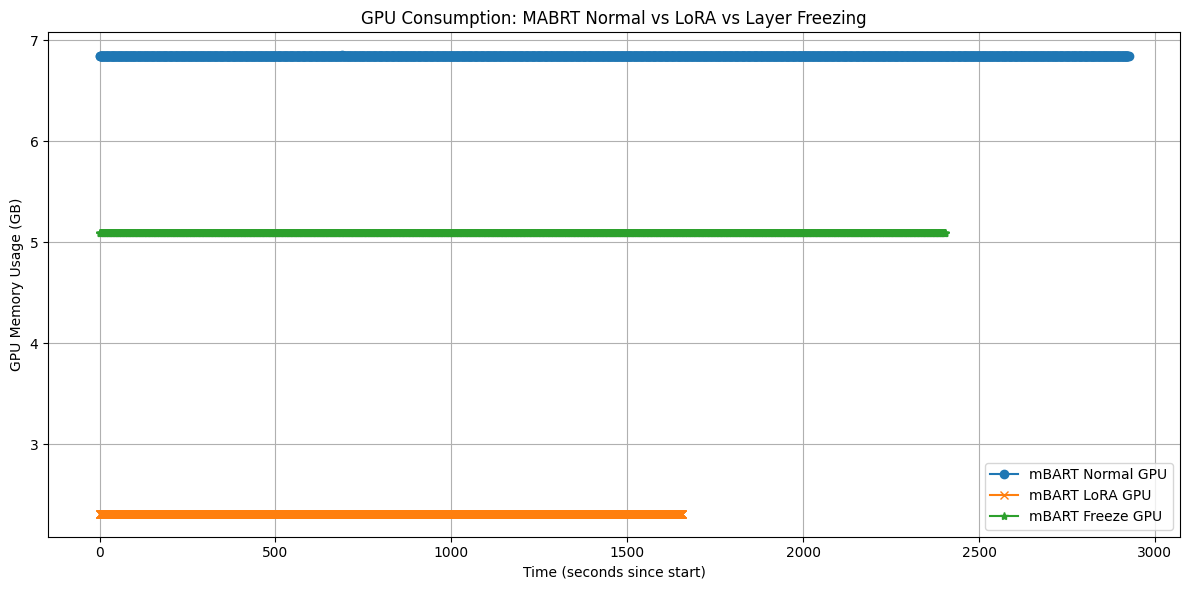

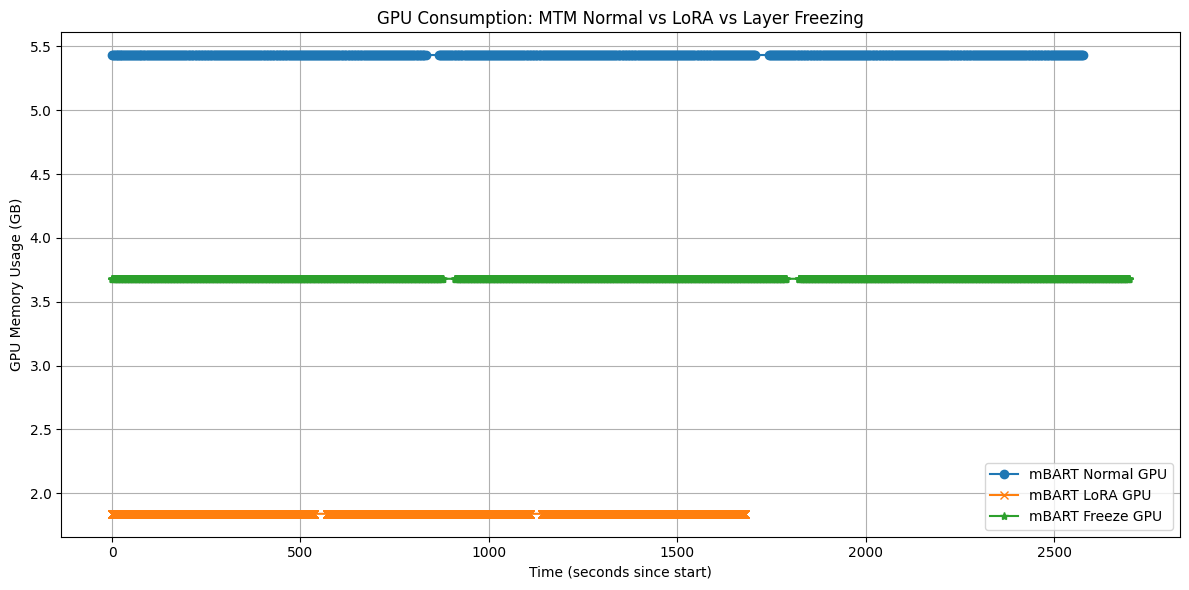

In [ ]:
# # Plot for mBart
plot_memory_usage("/content/drive/MyDrive/CIS5800/Log/mBART/Education/memory_usage.log",
                  "/content/drive/MyDrive/CIS5800/Log/mBART/Education/memory_usage_lora.log",
                  "/content/drive/MyDrive/CIS5800/Log/mBART/Education/memory_usage_freeze.log",
                  "mabrt")

# Plot for m2m
plot_memory_usage("/content/drive/MyDrive/CIS5800/Log/m2m/Education/memory_usage.log",
                  "/content/drive/MyDrive/CIS5800/Log/m2m/Education/memory_usage_lora.log",
                  "/content/drive/MyDrive/CIS5800/Log/m2m/Education/memory_usage_freeze.log",
                  "mtm")

## **7. Extra Exploration: Quantized General-Purpose LLMs and Language-Specific Models**


### **7.1 Pre-Quantized Llamma**

In [ ]:
model_name_or_path = "TheBloke/Chinese-Alpaca-2-7B-GPTQ"

Alpaca = AutoModelForCausalLM.from_pretrained(model_name_or_path,
                                             device_map="auto",
                                             trust_remote_code=False,
                                             revision="main")

Alpaca_tokenizer = AutoTokenizer.from_pretrained(model_name_or_path, use_fast=True)

prompt = "ÊàëÁà±Êú∫Âô®Â≠¶‰π†"
prompt_template=f'''Below is a Chinese sentence. Translate it into English.

### Instruction:
{prompt}

### Response:

'''

print("\n\n*** Generate:")

input_ids = Alpaca_tokenizer(prompt_template, return_tensors='pt').input_ids.cuda()
output = Alpaca.generate(inputs=input_ids, temperature=0.7, do_sample=True, top_p=0.95, top_k=40, max_new_tokens=512)
print(Alpaca_tokenizer.decode(output[0]).replace('</s>', ''))

Some weights of the model checkpoint at TheBloke/Chinese-Alpaca-2-7B-GPTQ were not used when initializing LlamaForCausalLM: ['model.layers.0.mlp.down_proj.bias', 'model.layers.0.mlp.gate_proj.bias', 'model.layers.0.mlp.up_proj.bias', 'model.layers.0.self_attn.k_proj.bias', 'model.layers.0.self_attn.o_proj.bias', 'model.layers.0.self_attn.q_proj.bias', 'model.layers.0.self_attn.v_proj.bias', 'model.layers.1.mlp.down_proj.bias', 'model.layers.1.mlp.gate_proj.bias', 'model.layers.1.mlp.up_proj.bias', 'model.layers.1.self_attn.k_proj.bias', 'model.layers.1.self_attn.o_proj.bias', 'model.layers.1.self_attn.q_proj.bias', 'model.layers.1.self_attn.v_proj.bias', 'model.layers.10.mlp.down_proj.bias', 'model.layers.10.mlp.gate_proj.bias', 'model.layers.10.mlp.up_proj.bias', 'model.layers.10.self_attn.k_proj.bias', 'model.layers.10.self_attn.o_proj.bias', 'model.layers.10.self_attn.q_proj.bias', 'model.layers.10.self_attn.v_proj.bias', 'model.layers.11.mlp.down_proj.bias', 'model.layers.11.mlp.ga



*** Generate:
<s> Below is a Chinese sentence. Translate it into English.

### Instruction:
ÊàëÁà±Êú∫Âô®Â≠¶‰π†

### Response:

I love machine learning.


In [ ]:
train_data, dev_data, test_data = load_data_from_txt(data_file_path, sample_size = 50000)

In [ ]:
from transformers import AutoModelForCausalLM

# Define the model name or path
model_name_or_path = "TheBloke/Chinese-Alpaca-2-7B-GPTQ"

# Load the model
model = AutoModelForCausalLM.from_pretrained(
    model_name_or_path,
    device_map="auto",             # Automatically map layers to available devices
    trust_remote_code=True         # Enable remote code if required
)

# Calculate the number of trainable parameters
trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f"Number of trainable parameters: {trainable_params}")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/924 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/4.28G [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/modeling_utils.py:5055: FutureWarning: `_is_quantized_training_enabled` is going to be deprecated in transformers 4.39.0. Please use `model.hf_quantizer.is_trainable` instead
  warnings.warn(
`loss_type=None` was set in the config but it is unrecognised.Using the default loss: `ForCausalLMLoss`.
Some weights of the model checkpoint at TheBloke/Chinese-Alpaca-2-7B-GPTQ were not used when initializing LlamaForCausalLM: ['model.layers.0.mlp.down_proj.bias', 'model.layers.0.mlp.gate_proj.bias', 'model.layers.0.mlp.up_proj.bias', 'model.layers.0.self_attn.k_proj.bias', 'model.layers.0.self_attn.o_proj.bias', 'model.layers.0.self_attn.q_proj.bias', 'model.layers.0.self_attn.v_proj.bias', 'model.layers.1.mlp.down_proj.bias', 'model.layers.1.mlp.gate_proj.bias', 'model.layers.1.mlp.up_proj.bias', 'model.layers.1.self_attn.k_proj.bias', 'model.layers.1.self_attn.o_proj.bias', 'model.layers.1.self_attn.q_proj.bias', 'model.layers.1.self_attn.v

generation_config.json:   0%|          | 0.00/131 [00:00<?, ?B/s]

Number of trainable parameters: 453251072


In [ ]:
evaluate_bleu_score(Alpaca, Alpaca_tokenizer, test_data, max_length=200, device="cuda", Alpaca = True)

Calculating BLEU Scores: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 5000/5000 [10:06:58<00:00,  7.28s/it]

Average BLEU score for the test set: 0.0511


0.051076716055391054

### **7.2 MarianMT - Chinese to English Only**

In [ ]:
model_id = "Helsinki-NLP/opus-mt-zh-en"

quantization_config = BitsAndBytesConfig(load_in_8bit=True)

MarianMT_tokenizer = AutoTokenizer.from_pretrained(model_id)
MarianMT_model = AutoModelForSeq2SeqLM.from_pretrained(
    model_id,
    quantization_config=quantization_config,
    low_cpu_mem_usage=True
)

input_text = "ÊàëÁà±Êú∫Âô®Â≠¶‰π†ÔºåÊàëÁà±Ëá™ÁÑ∂ËØ≠Ë®ÄÂ§ÑÁêÜ"
inputs = MarianMT_tokenizer(input_text, return_tensors="pt").to("cuda")
outputs = MarianMT_model.generate(**inputs, max_length=50)

translated_text = MarianMT_tokenizer.decode(outputs[0], skip_special_tokens=True)
print(translated_text)

/usr/local/lib/python3.10/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


model.safetensors:   0%|          | 0.00/312M [00:00<?, ?B/s]

I love machine learning. I love natural language.


**Trainable Parameters for Self-Quantized Mariana MT**

In [ ]:
from transformers import AutoModel

# Load the model
model_name = "Helsinki-NLP/opus-mt-zh-en"
model = AutoModel.from_pretrained(model_name)

# Count the number of trainable parameters
trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f"Number of trainable parameters: {trainable_params}")

Number of trainable parameters: 77419008


In [ ]:
train_data, dev_data, test_data = load_data_from_txt(data_file_path, sample_size = 50000)

Loaded train data with 40000 samples.
Loaded dev data with 5000 samples.
Loaded test data with 5000 samples.


In [ ]:
evaluate_bleu_score(MarianMT_model, MarianMT_tokenizer, test_data, max_length=200, device="cuda", Alpaca = False)

Calculating BLEU Scores: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 5000/5000 [1:20:03<00:00,  1.04it/s]

Average BLEU score for the test set: 0.1029


0.10293217807613292